### **Qu'est-ce que la classification dans l'apprentissage automatique ?**
- La classification est une méthode d'apprentissage automatique supervisée dans laquelle le modèle tente de prédire l'étiquette correcte d'une donnée d'entrée.
- Dans la classification, le modèle est entièrement formé à l'aide des données d'apprentissage, puis il est évalué sur des données de test avant d'être utilisé pour effectuer des prédictions sur de nouvelles données inédites.
- Types de classification :
   - **Classification binaire:**
      - Exemple prédire si une transaction bancaire est frauduleuse ou non
   - **Classification multi classes :**
      - Exemple Prédire la classe d'appratenance d'un animal (Chien, Chat, Cheval)
   - **Classification multi-label :**
      - Exemple : Prédire la liste des objet qui se trouvent dans une photo ou un texte.

### **Algorithmes de classification :**

- Il existe deux types d'apprenants dans la classification de l'apprentissage automatique : les apprenants paresseux et les apprenants enthousiastes :
   - Les apprenants enthousiastes sont des algorithmes d'apprentissage automatique qui construisent d'abord un modèle à partir de l'ensemble de données d'apprentissage avant de faire des prédictions sur les futurs ensembles de données. Ils passent plus de temps au cours du processus de formation en raison de leur volonté d'obtenir une meilleure généralisation au cours de la formation grâce à l'apprentissage des poids, mais ils ont besoin de moins de temps pour faire des prédictions.  La plupart des algorithmes d'apprentissage automatique sont des apprenants enthousiastes, dont voici quelques exemples :
     - Régression logistique.
     - Machine à vecteur de support.
     - Arbres de décision.
     - Réseaux neuronaux artificiels.

   - Les apprenants paresseux ou les apprenants basés sur les instances, en revanche, ne créent pas de modèle immédiatement à partir des données d'apprentissage, et c'est de là que vient l'aspect paresseux. Ils se contentent de mémoriser les données d'apprentissage et, à chaque fois qu'il est nécessaire de faire une prédiction, ils recherchent le plus proche voisin à partir de l'ensemble des données d'apprentissage, ce qui les rend très lents lors de la prédiction. Exemple :

    - KNN (K-Nearest Neighbor) : K Voisins les plus proches

### **Regression Logistique**
- La régression logistique est un algorithme d'apprentissage supervisé utilisé pour les problèmes de classification binaire, c'est-à-dire lorsque la variable dépendante est catégorielle
- Dans la régression logistique, nous utilisons la fonction sigmoïde pour calculer la probabilité de la variable dépendante.
- Exemples :
   - Prédire si un email est spam ou non
   - Prédire si une patient est malade ou non
   - Prédire si une transactions bancaire est frauduleuse ou pas
- L'image ci-dessous montre comment la régression logistique diffère de la régression linéaire dans l'ajustement du modèle.

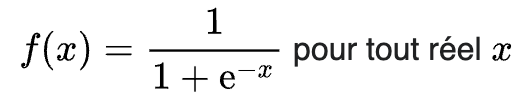

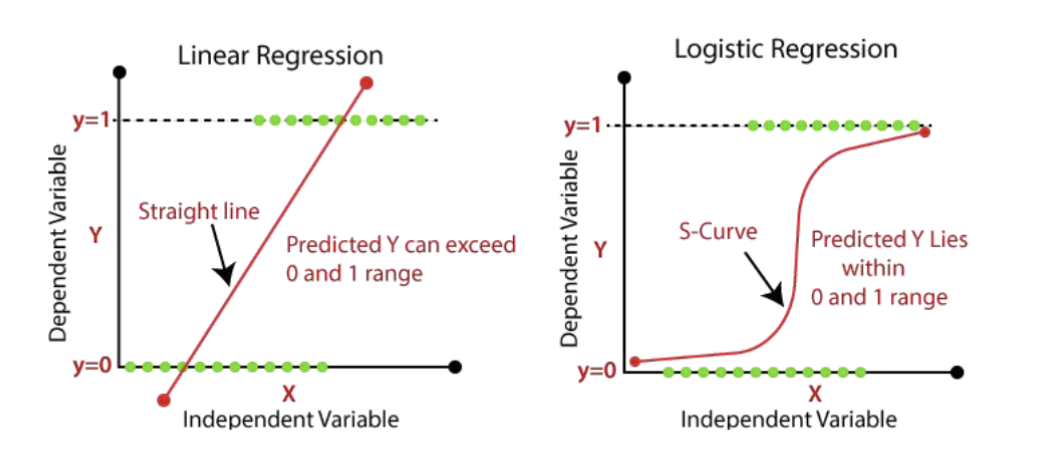

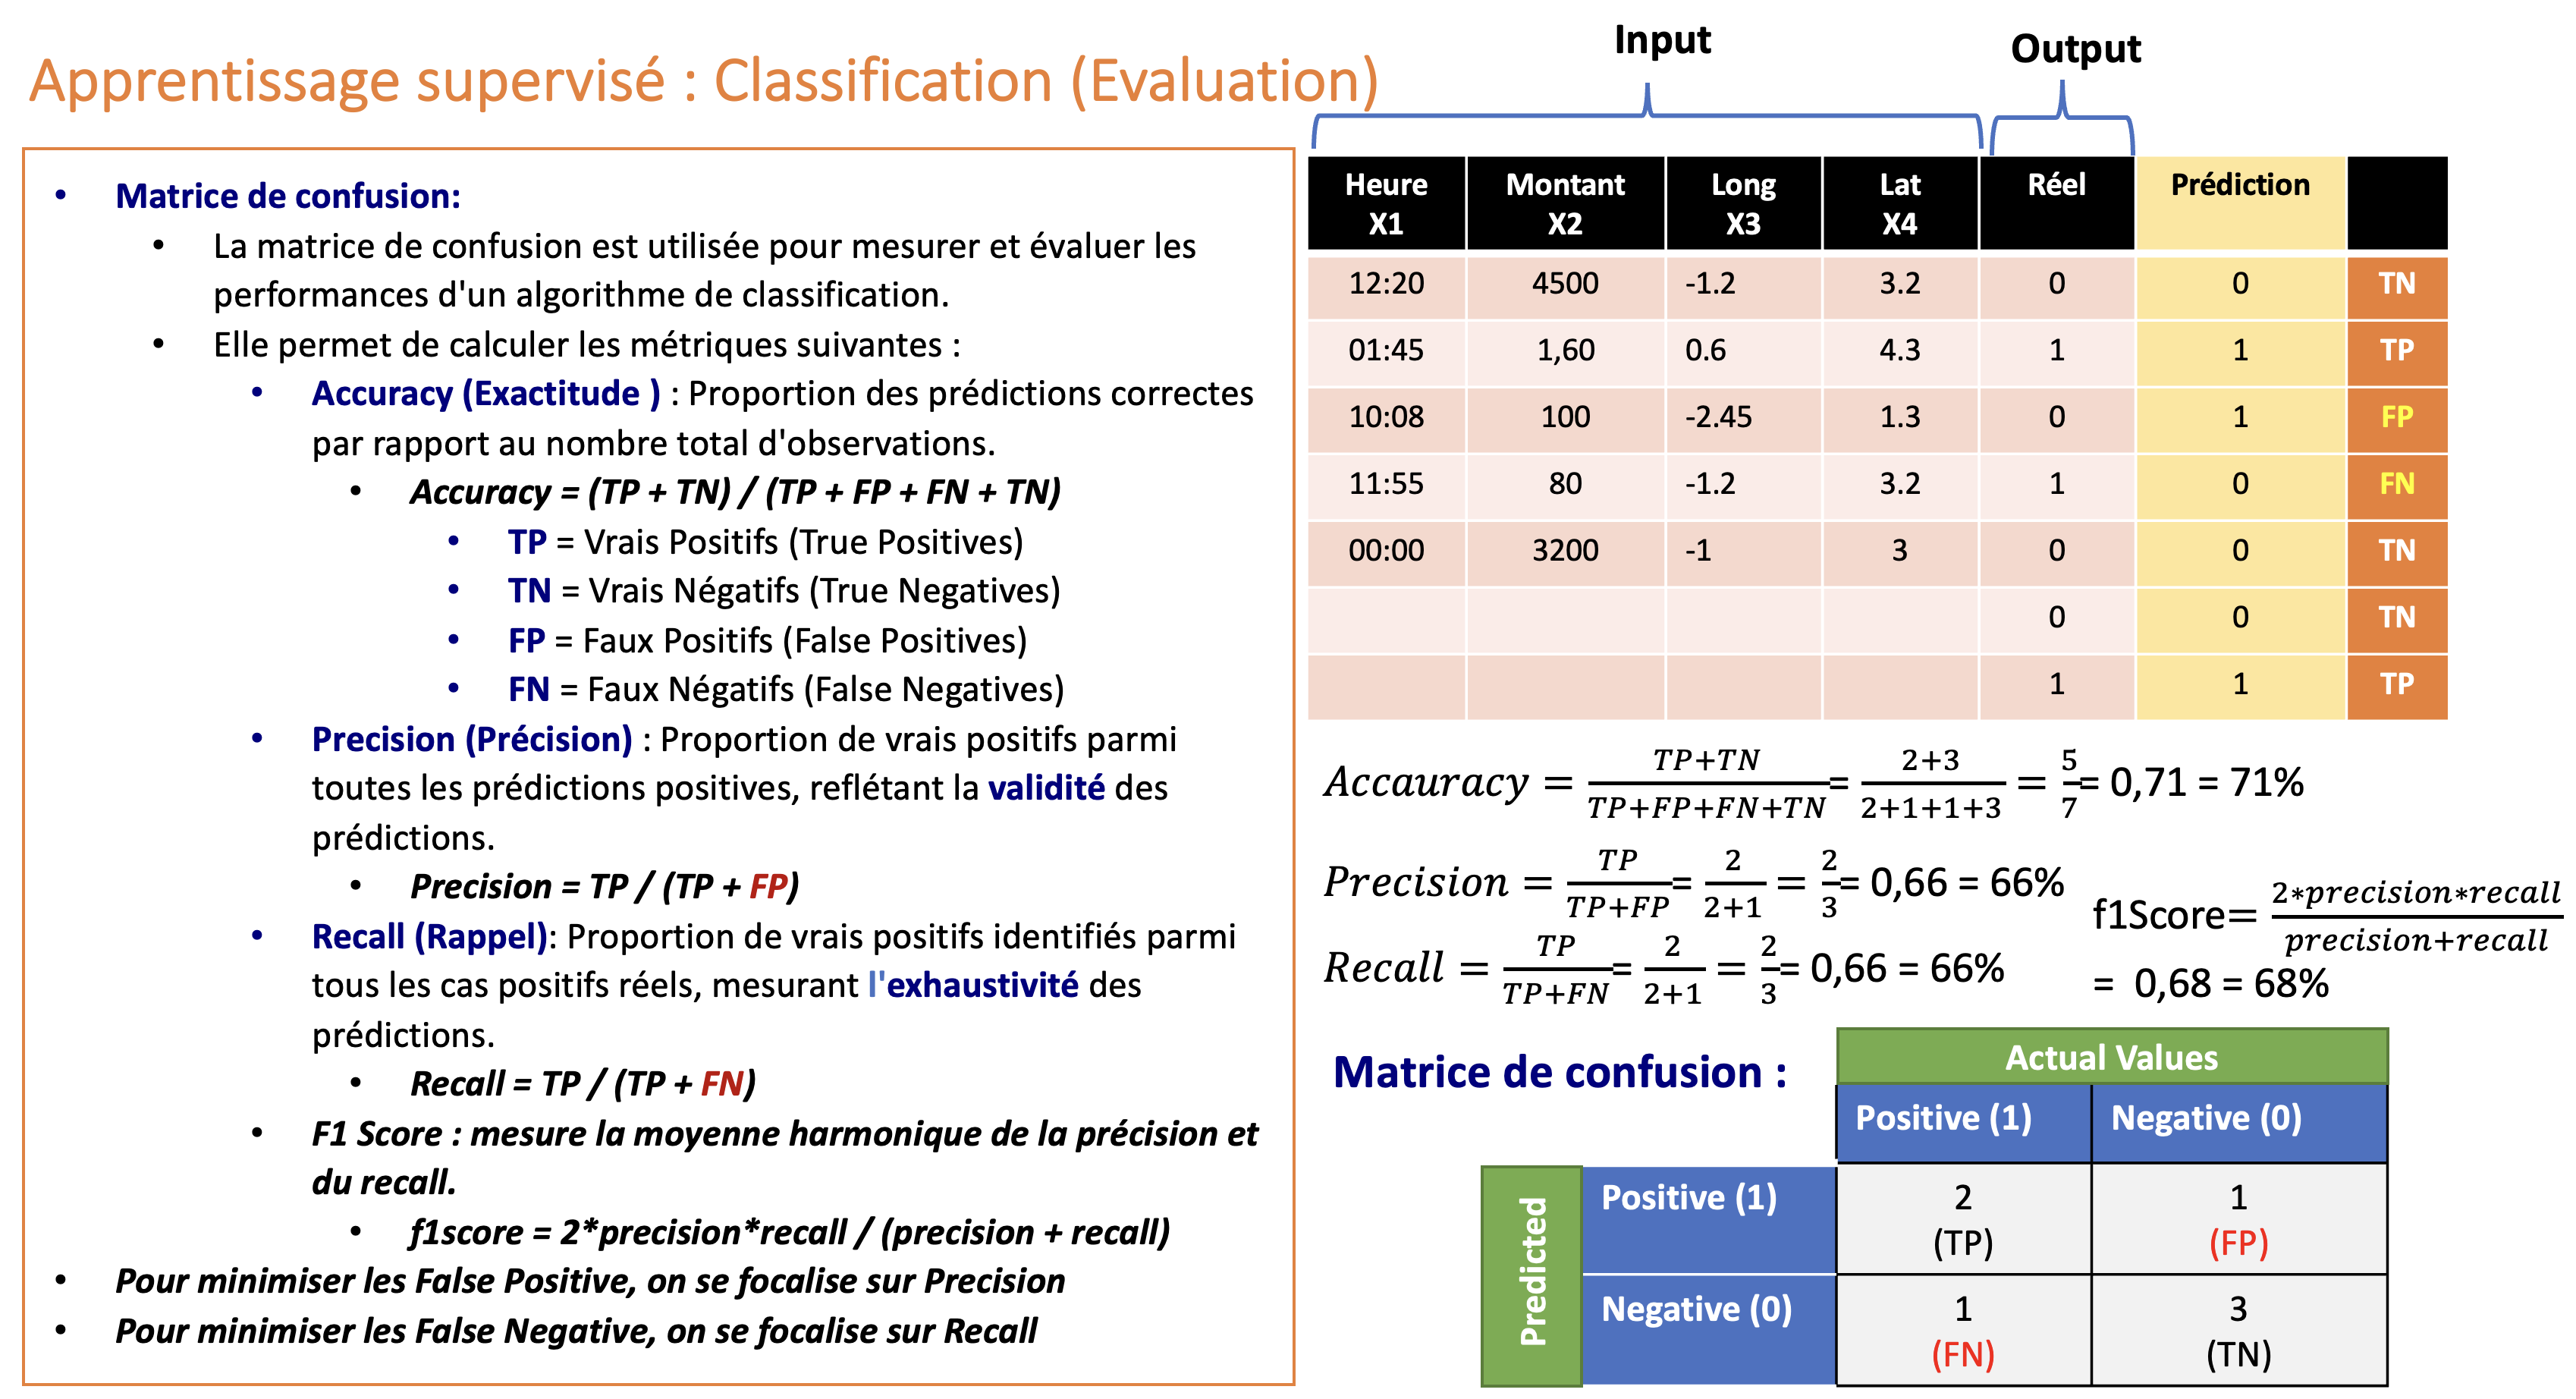

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np

### **Contexte**  
Ce jeu de données provient à l'origine du **National Institute of Diabetes and Digestive and Kidney Diseases** (États-Unis). L'objectif est de prédire, sur la base de mesures diagnostiques, si un patient est atteint de diabète.  

---

### **Contenu**  
Les instances sélectionnées pour ce jeu de données respectent plusieurs critères tirés d'une base de données plus large :  
- Toutes les patientes sont des **femmes** d'**au moins 21 ans** d'origine **amérindienne Pima**.  

**Variables :**  
1. **Pregnancies(Grossesses)** : Nombre de grossesses.  
2. **Glucose** : Concentration de glucose plasmatique (mesurée 2 heures après un test de tolérance au glucose oral).  
3. **BloodPressure(Pression artérielle)** : Pression artérielle diastolique (en mm Hg).  
4. **SkinThickness(Épaisseur de la peau)** : Épaisseur du pli cutané du triceps (en mm).  
5. **Insulin(Insuline)** : Taux d'insuline sérique à 2 heures (en mu U/ml).  
6. **BMI(IMC)** : Indice de masse corporelle (poids en kg / (taille en m)²).  
7. **DiabetesPedigreeFunction(Fonction pedigree du diabète)** : Score génétique reflétant l'hérédité liée au diabète.  
8. **Age(Âge)** : Âge (en années).  
9. **Outcome(Résultat)** : Variable cible (0 = non diabétique, 1 = diabétique).  

---

### **Sources**   
 - **National Institute of Diabetes and Digestive and Kidney Diseases* (États-Unis).**  
---

In [2]:
# Charger les données
df = pd.read_csv('diabetes.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'diabetes.csv'

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
102            0      125             96              0        0  22.5   
31             3      158             76             36      245  31.6   
358           12       88             74             40       54  35.3   
279            2      108             62             10      278  25.3   
304            3      150             76              0        0  21.0   
345            8      126             88             36      108  38.5   
220            0      177             60             29      478  34.6   
406            4      115             72              0        0  28.9   
322            0      124             70             20        0  27.4   
324            2      112             75             32        0  35.7   

     DiabetesPedigreeFunction  Age  Outcome  
102                     0.262   21        0  
31                      0.851   28        1  
358                     0.378   48        0  
279                     0.881   22        0  
304                     0.207   37        0  
345                     0.349   49        0  
220                     1.072   21        1  
406                     0.376   46        1  
322                     0.254   36        1  
324                     0.148   21        0

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0,np.nan)

In [ ]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
# Valeurs manquantes
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

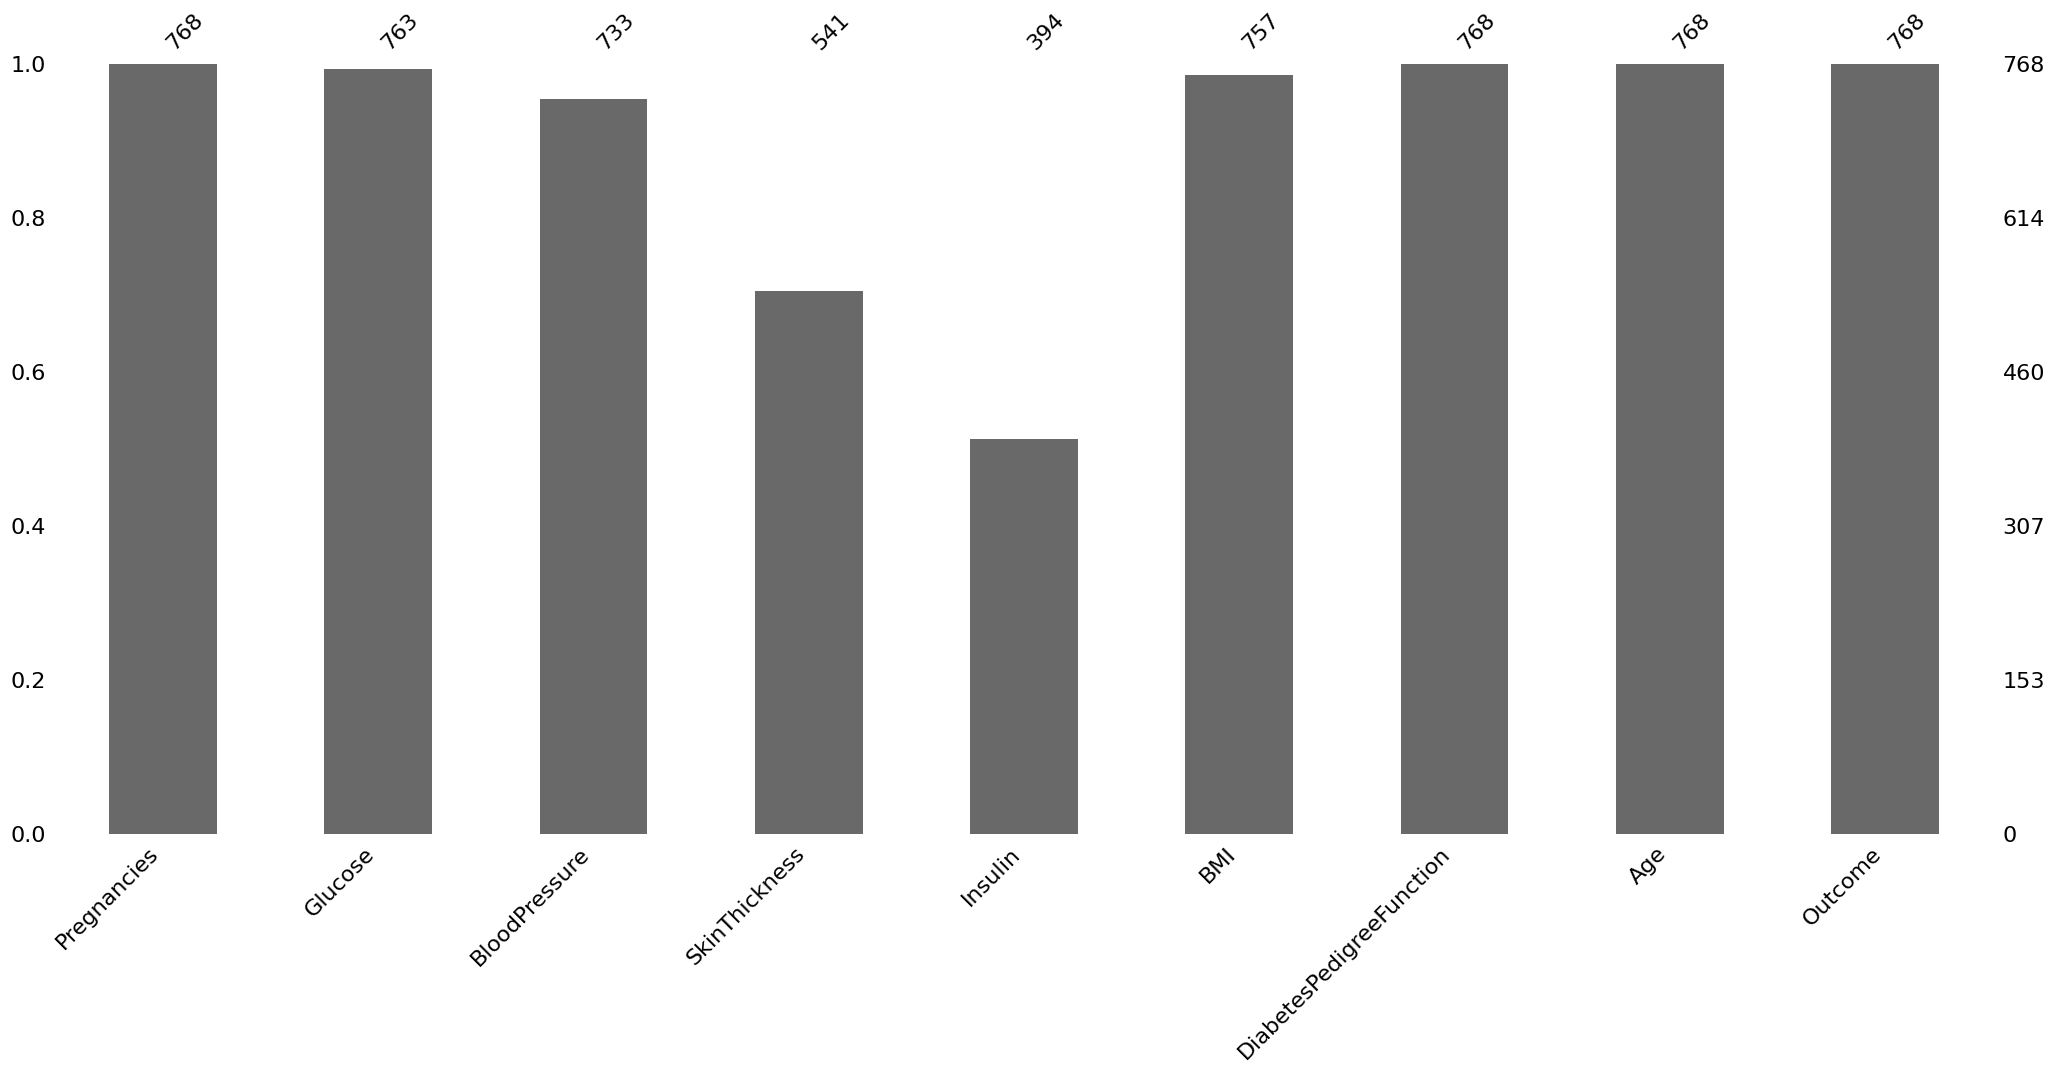

In [ ]:
# Plotting
import missingno as msno
msno.bar(df);

<Axes: >

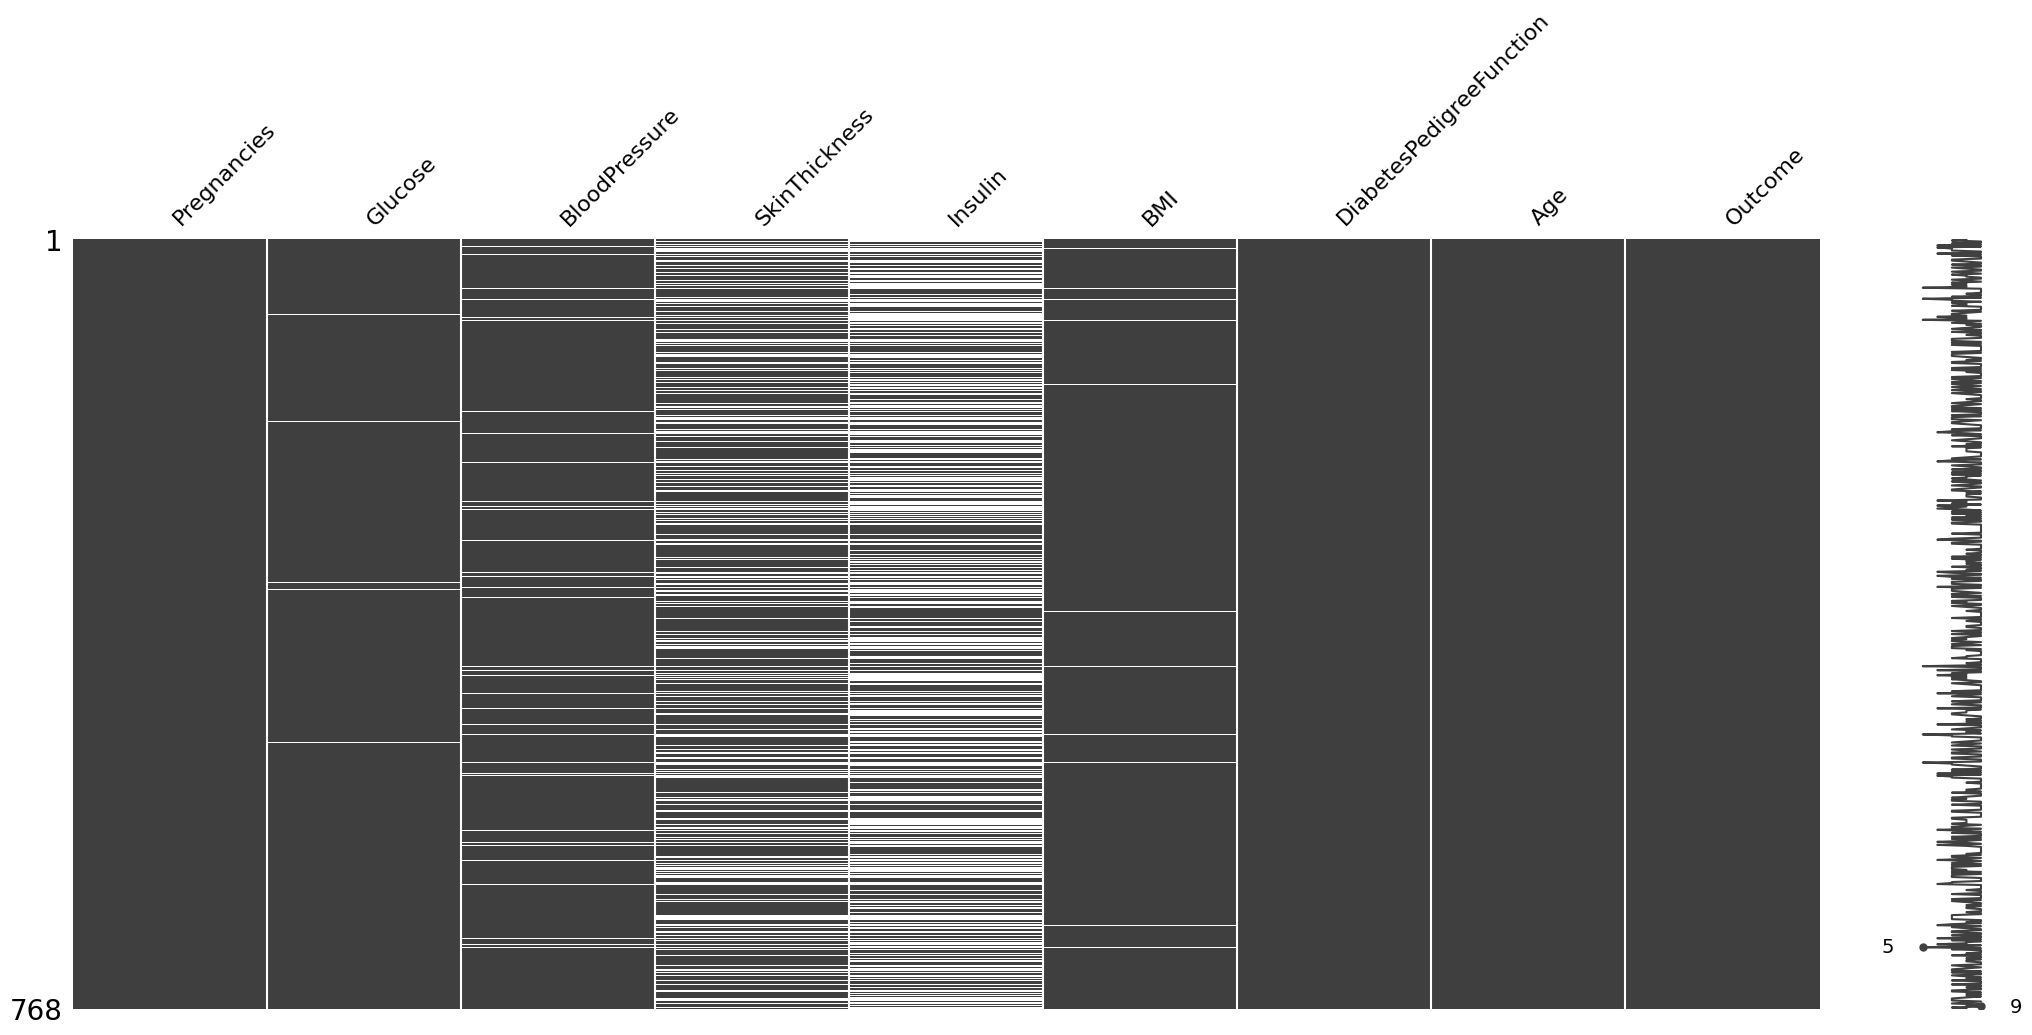

In [ ]:
msno.matrix(df)

In [ ]:
# The values to be given for incomplete observations are given the median value of people who are not sick
# and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for col in columns:
    median = df[col].median()
    df[col]=df[col].fillna(median)

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

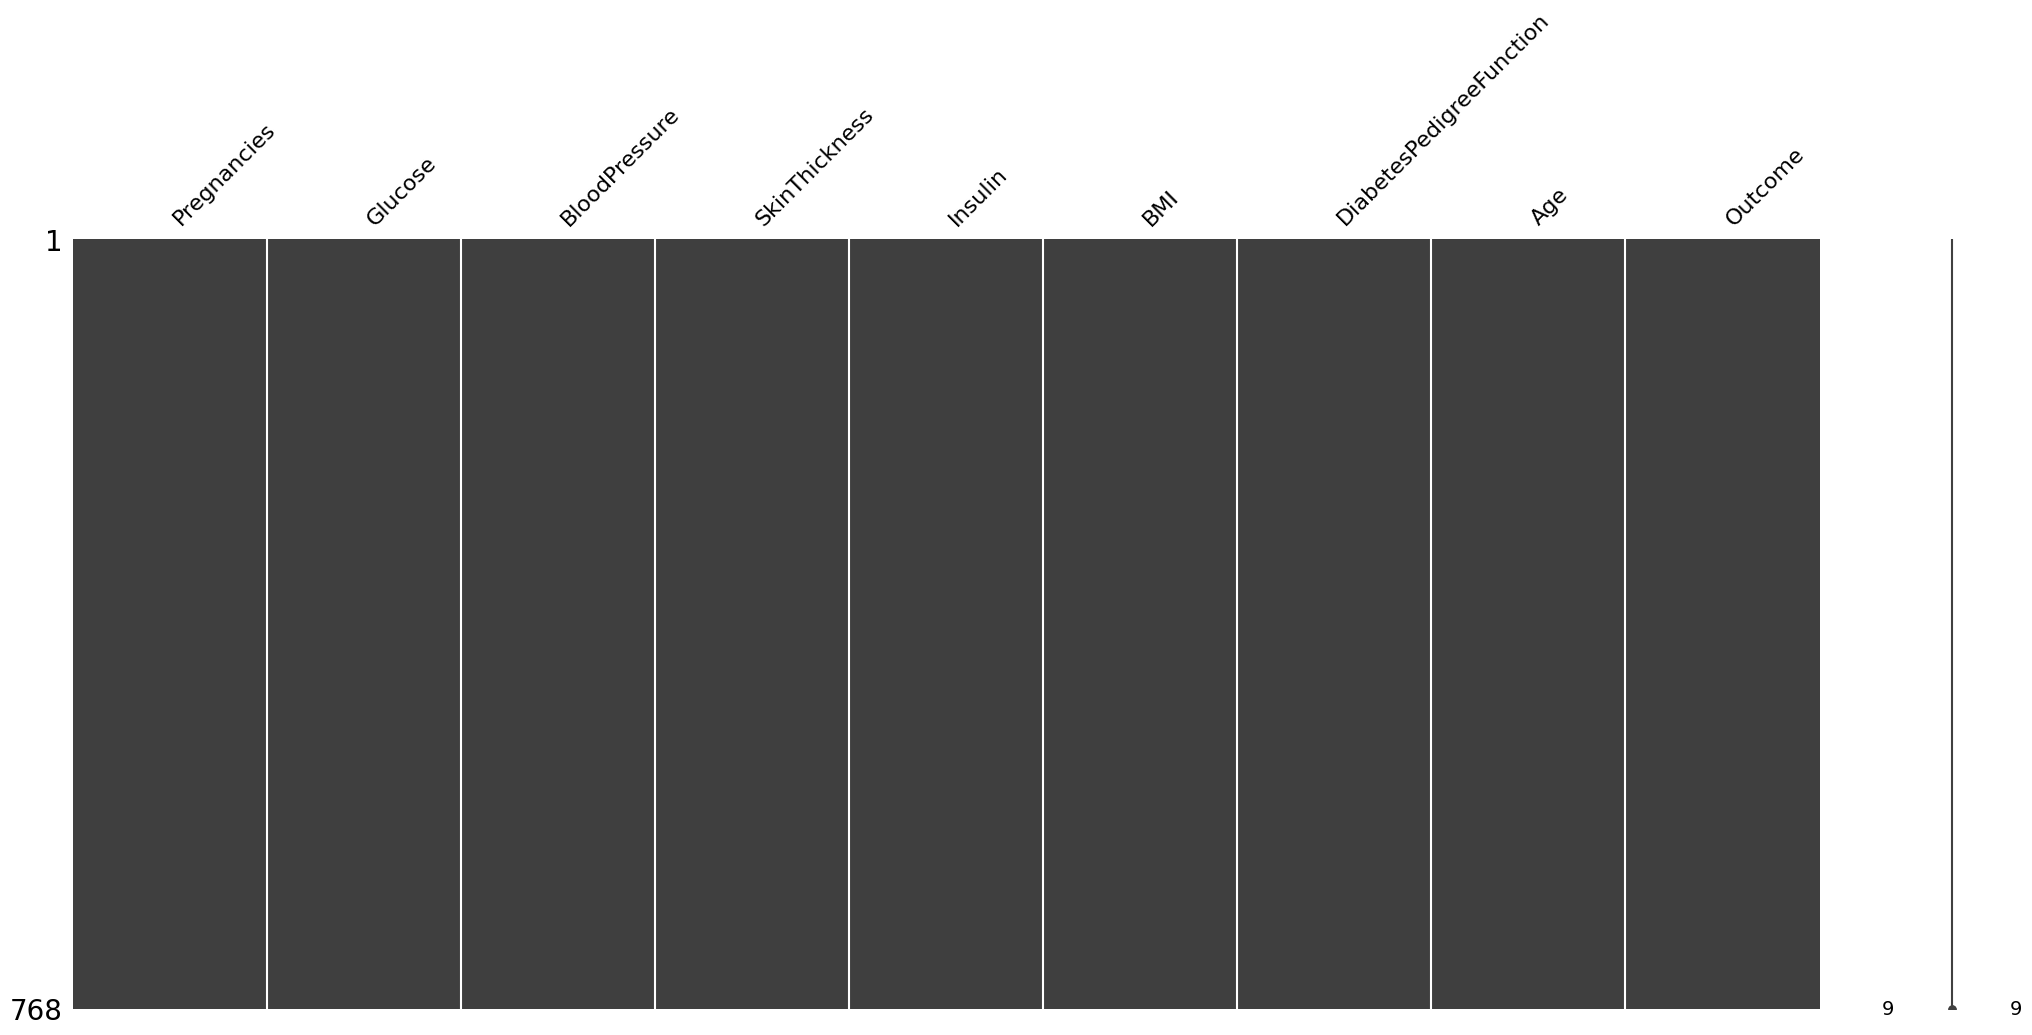

In [ ]:
msno.matrix(df)

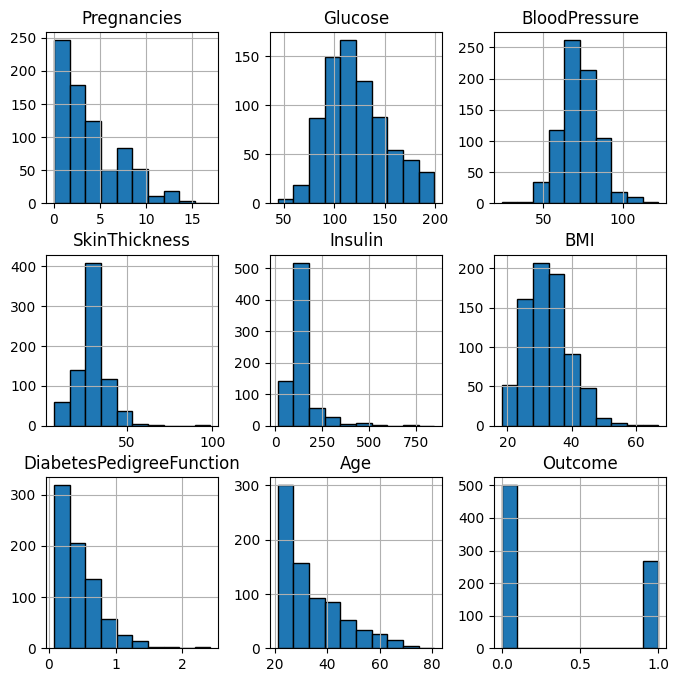

In [ ]:
# Creating histograms
df.hist(figsize=(8,8), edgecolor = "black")
plt.show()

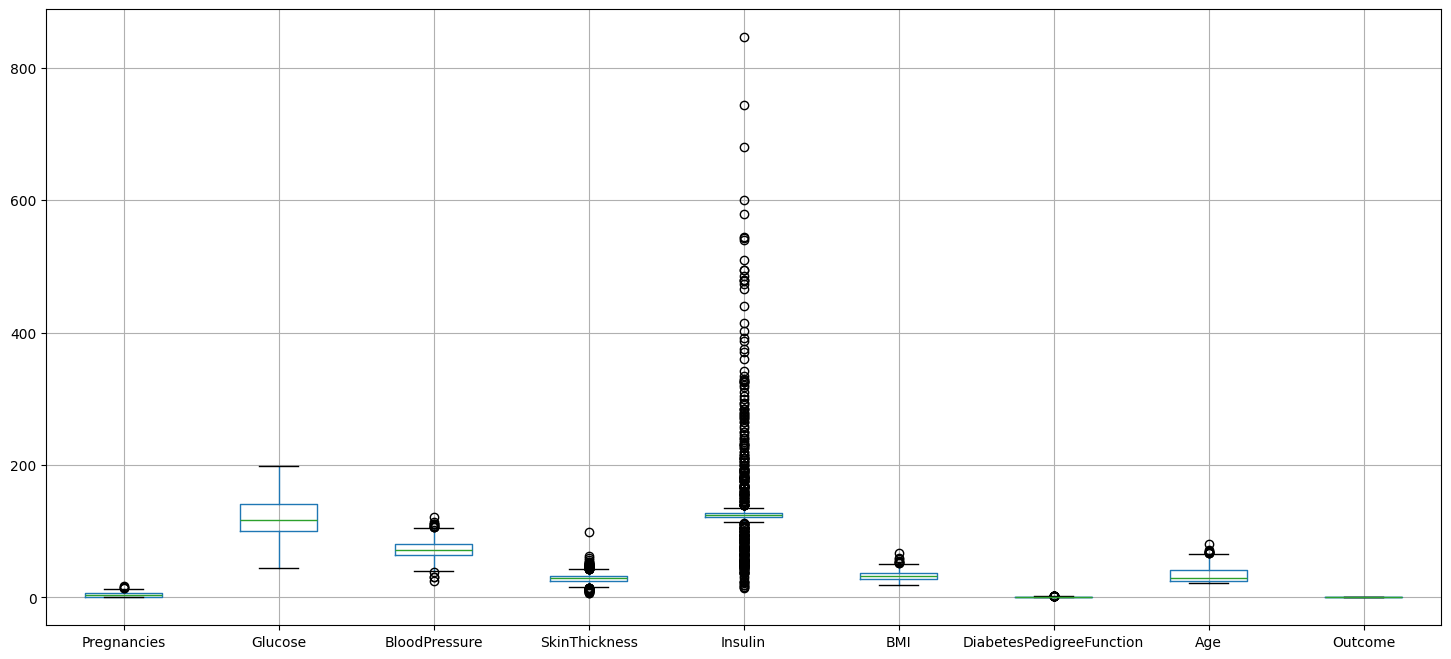

In [ ]:
df.boxplot(figsize=(18,8))
#plt.figure(figsize=(18,10))
#sns.boxplot(df, orient='h')
plt.show()

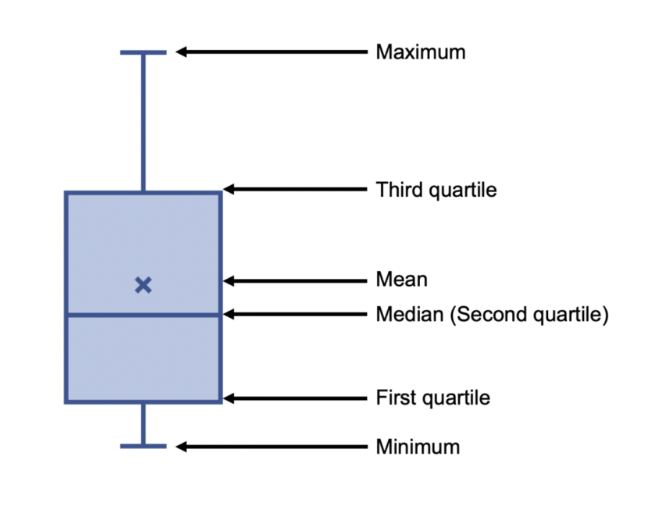

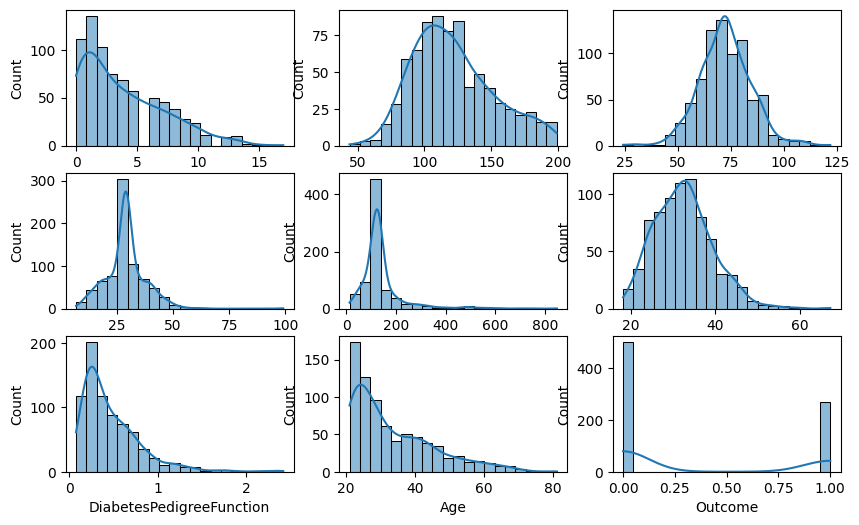

In [ ]:
cols = df.columns
fig, ax = plt.subplots(3,3, figsize=(10,6))
row_index = 0
col_index = 0
for col in cols :
    sns.histplot(df[col], bins = 20, ax=ax[row_index,col_index],kde=True)
    col_index = col_index +1
    if(col_index ==3):
        col_index=0
        row_index = row_index +1


In [ ]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

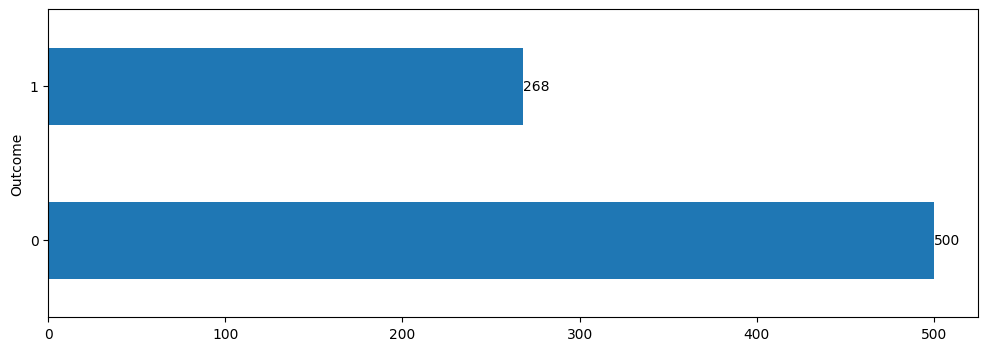

In [ ]:
bar=df['Outcome'].value_counts().plot.barh(figsize=(12,4))
bar=bar.bar_label(bar.containers[0], fontsize=10)

In [ ]:
pd.crosstab(df['Age'],df['Outcome'], normalize='index')*100

Outcome           0           1
Age                            
21        92.063492    7.936508
22        84.722222   15.277778
23        81.578947   18.421053
24        82.608696   17.391304
25        70.833333   29.166667
26        75.757576   24.242424
27        75.000000   25.000000
28        71.428571   28.571429
29        55.172414   44.827586
30        71.428571   28.571429
31        45.833333   54.166667
32        43.750000   56.250000
33        41.176471   58.823529
34        71.428571   28.571429
35        50.000000   50.000000
36        37.500000   62.500000
37        68.421053   31.578947
38        37.500000   62.500000
39        75.000000   25.000000
40        53.846154   46.153846
41        40.909091   59.090909
42        61.111111   38.888889
43        15.384615   84.615385
44        37.500000   62.500000
45        46.666667   53.333333
46        46.153846   53.846154
47        33.333333   66.666667
48        80.000000   20.000000
49        40.000000   60.000000
50        37.500000   62.500000
51        37.500000   62.500000
52        12.500000   87.500000
53        20.000000   80.000000
54        33.333333   66.666667
55        75.000000   25.000000
56        33.333333   66.666667
57        80.000000   20.000000
58        57.142857   42.857143
59        33.333333   66.666667
60        60.000000   40.000000
61        50.000000   50.000000
62        50.000000   50.000000
63       100.000000    0.000000
64       100.000000    0.000000
65       100.000000    0.000000
66        50.000000   50.000000
67        66.666667   33.333333
68       100.000000    0.000000
69       100.000000    0.000000
70         0.000000  100.000000
72       100.000000    0.000000
81       100.000000    0.000000

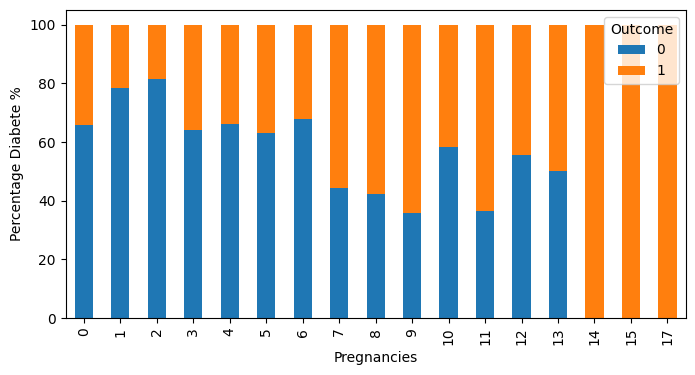

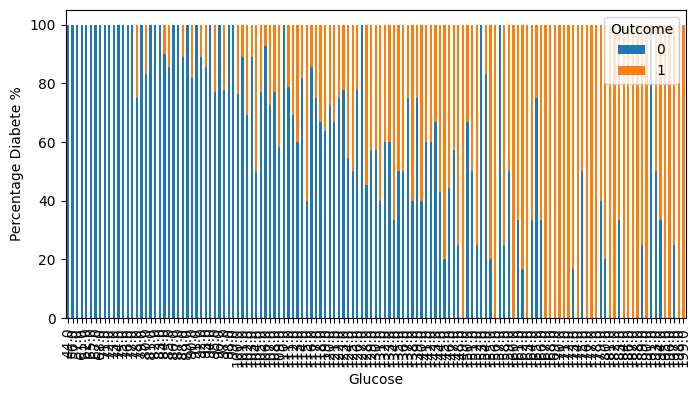

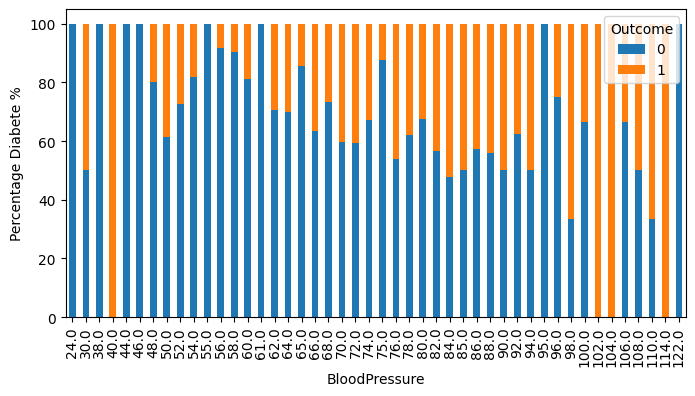

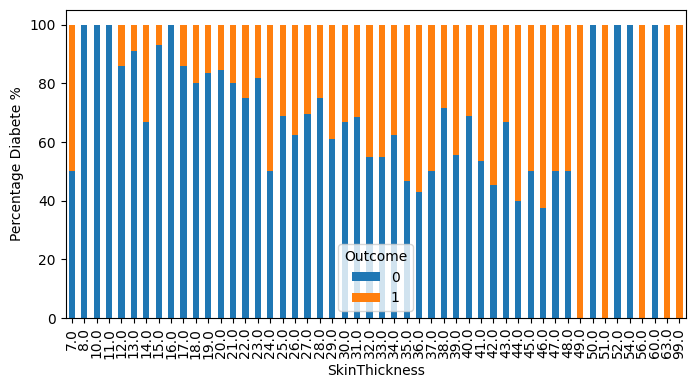

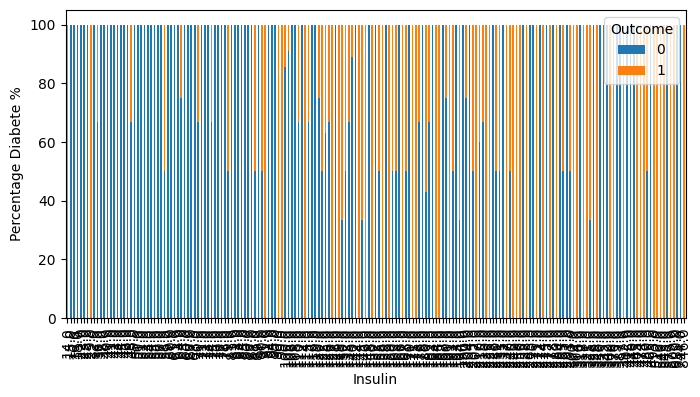

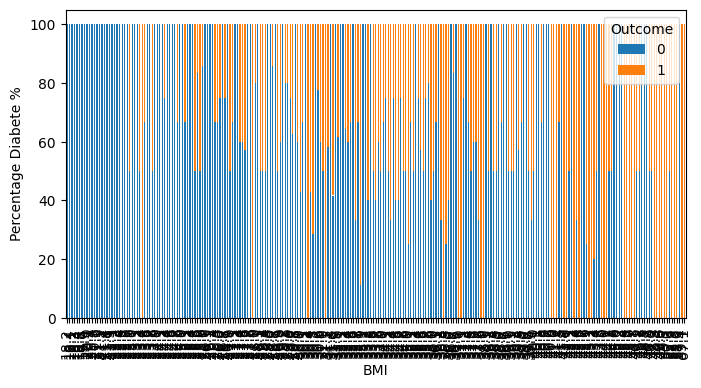

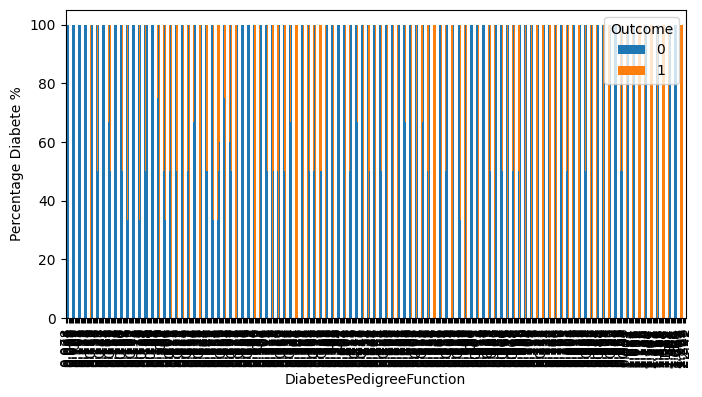

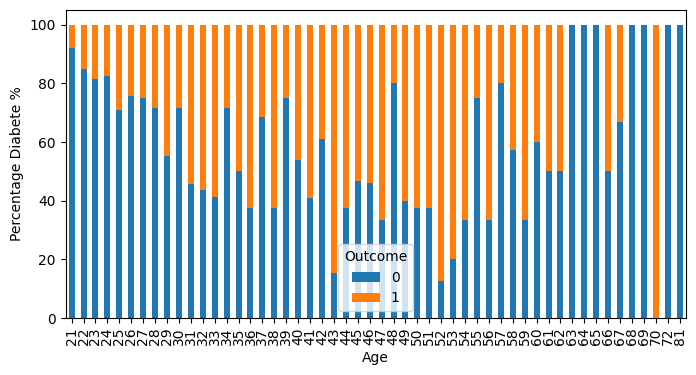

In [ ]:
for i in df.columns:
    if i!='Outcome':
        (pd.crosstab(
            df[i],df['Outcome'],normalize='index')*100).plot(
            kind='bar',
            figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Diabete %')

In [ ]:
df.groupby(['Outcome'])[df.columns].mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      27.726000  127.792000   
1           4.865672  142.130597      75.123134      31.686567  164.701493   

               BMI  DiabetesPedigreeFunction        Age  Outcome  
Outcome                                                           
0        30.885600                  0.429734  31.190000      0.0  
1        35.383582                  0.550500  37.067164      1.0

<Axes: xlabel='Outcome'>

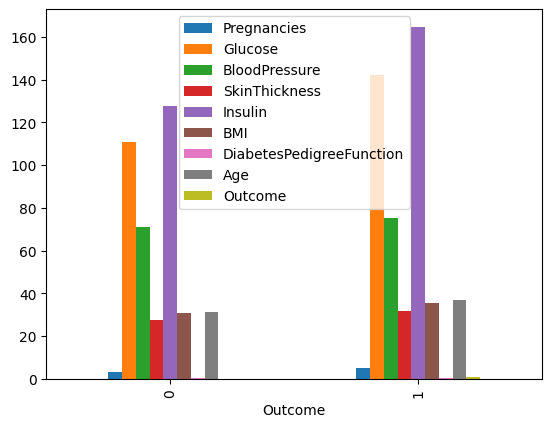

In [ ]:
df.groupby(['Outcome'])[df.columns].mean().plot.bar()

In [ ]:
y = df['Outcome']
X= df.drop(columns=['Outcome'])

<Axes: >

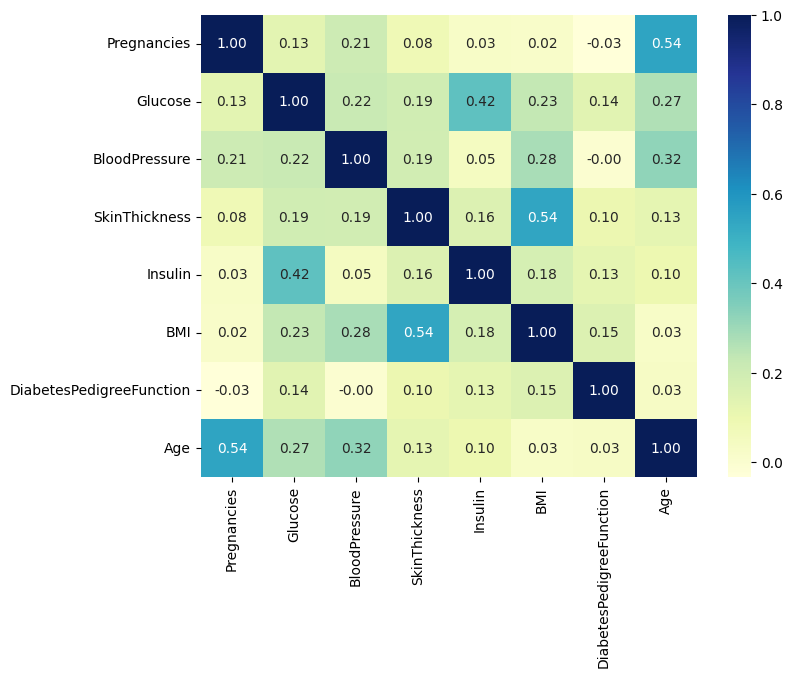

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
X_train.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
429            1     95.0           82.0           25.0    180.0  35.0   
524            3    125.0           58.0           29.0    125.0  31.6   
212            7    179.0           95.0           31.0    125.0  34.2   
558           11    103.0           68.0           40.0    125.0  46.2   
66             0    109.0           88.0           30.0    125.0  32.5   

     DiabetesPedigreeFunction  Age  
429                     0.233   43  
524                     0.151   24  
212                     0.164   60  
558                     0.126   42  
66                      0.855   38

In [ ]:
X_train_scaled.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.847578 -0.854765       0.814151      -0.493730  0.435780  0.377880   
1    -0.244332  0.131856      -1.206800      -0.015151 -0.195233 -0.126494   
2     0.962161  1.907772       1.908833       0.224139 -0.195233  0.259203   
3     2.168653 -0.591666      -0.364737       1.300943 -0.195233  2.039345   
4    -1.149201 -0.394342       1.319389       0.104494 -0.195233  0.007017   

   DiabetesPedigreeFunction       Age  
0                 -0.695485  0.815489  
1                 -0.943389 -0.789224  
2                 -0.904087  2.251285  
3                 -1.018969  0.731031  
4                  1.184953  0.393196

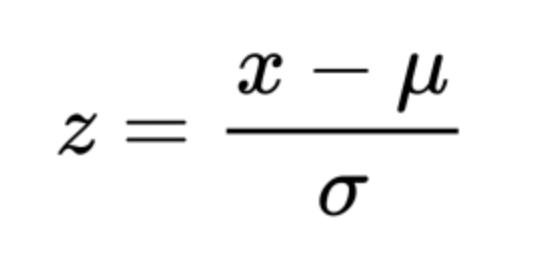

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**

### **Logistic Regression Model**

- Logistic Regression is a supervised learning algorithm which is used for **binary classification problems** i.e. where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event y, given some features x as:

                                          P(y)=1/exp(1 + exp(-x))

In [ ]:
model_lgr = LogisticRegression(max_iter=1000)

In [ ]:
model_lgr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_train = model_lgr.predict(X_train_scaled)
y_pred_test = model_lgr.predict(X_test_scaled)

In [ ]:
print("Accuracy",metrics.accuracy_score(y_train, y_pred_train))
print("Precision",metrics.precision_score(y_train, y_pred_train))
print("Recall",metrics.recall_score(y_train, y_pred_train))

Accuracy 0.7672253258845437
Precision 0.7099236641221374
Recall 0.5166666666666667


In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       357
           1       0.71      0.52      0.60       180

    accuracy                           0.77       537
   macro avg       0.75      0.71      0.72       537
weighted avg       0.76      0.77      0.76       537



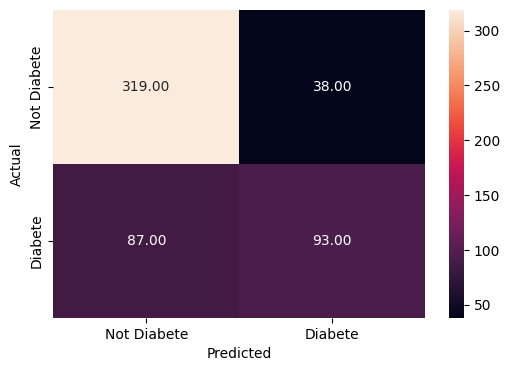

In [ ]:
cm = metrics.confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Diabete', 'Diabete'], yticklabels=['Not Diabete', 'Diabete'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       143
           1       0.78      0.60      0.68        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



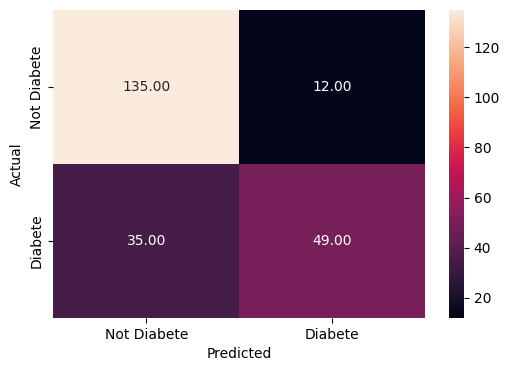

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Diabete', 'Diabete'], yticklabels=['Not Diabete', 'Diabete'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = metrics.confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Diabete', 'Diabete'], yticklabels=['Not Diabete', 'Diabete'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       357
           1       0.71      0.52      0.60       180

    accuracy                           0.77       537
   macro avg       0.75      0.71      0.72       537
weighted avg       0.76      0.77      0.76       537



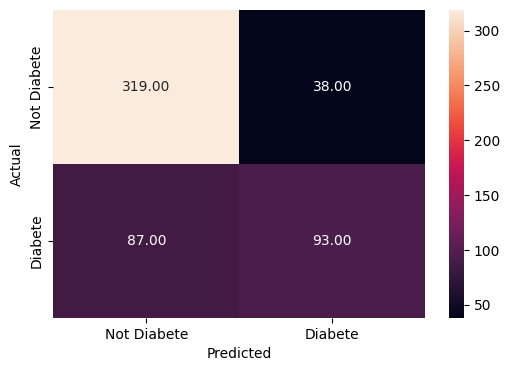

In [ ]:
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       143
           1       0.78      0.60      0.68        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



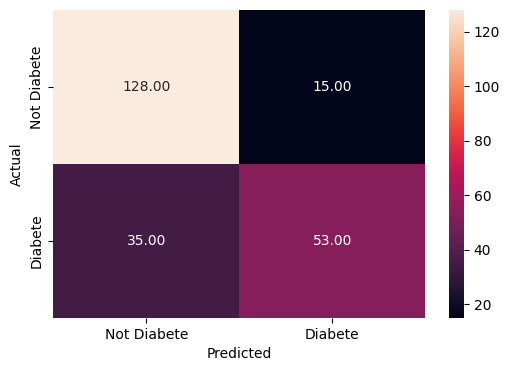

In [ ]:
metrics_score(y_test, y_pred_test)

In [ ]:
# Printing the coefficients of logistic regression
cols=X.columns
coef_lg=model_lgr.coef_
coefs=pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)
coefs

0
Glucose                   1.085682
BMI                       0.628917
Pregnancies               0.387982
DiabetesPedigreeFunction  0.256931
Age                       0.134037
SkinThickness             0.008910
BloodPressure            -0.125143
Insulin                  -0.184905

<Axes: >

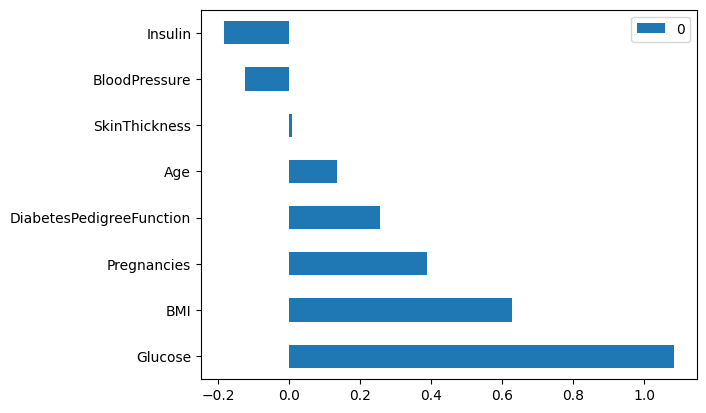

In [ ]:
coefs.plot.barh()

The coefficients of the **logistic regression** model give us the **log of odds**, which is hard to interpret in the real world. We can convert the **log of odds into real odds** by taking its exponential.

In [ ]:
import numpy as np
# Finding the odds
odds = np.exp(model_lgr.coef_[0])

# Adding the odds to a dataframe and sorting the values
df_odds=pd.DataFrame(odds, X_train_scaled.columns, columns = ['odds']).sort_values(by ='odds', ascending = True)
df_odds

odds
Insulin                   0.831183
BloodPressure             0.882371
SkinThickness             1.008950
Age                       1.143435
DiabetesPedigreeFunction  1.292956
Pregnancies               1.474003
BMI                       1.875578
Glucose                   2.961460

<Axes: >

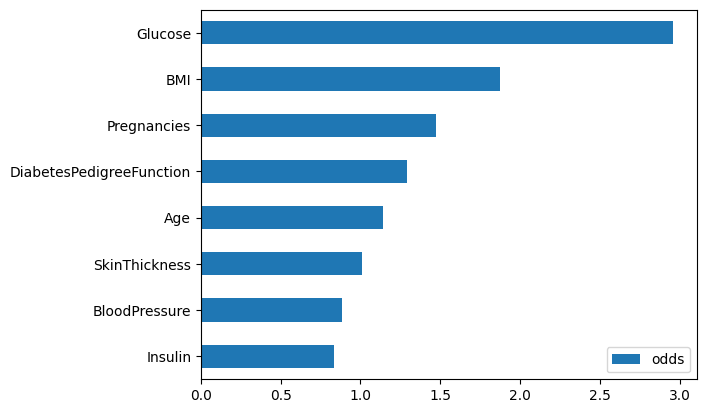

In [ ]:
df_odds.plot.barh()

### **Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

In [ ]:
y_scores_lg=model_lgr.predict_proba(X_train_scaled)
y_scores_lg

array([[0.89798657, 0.10201343],
       [0.74875639, 0.25124361],
       [0.17127307, 0.82872693],
       ...,
       [0.88653322, 0.11346678],
       [0.749124  , 0.250876  ],
       [0.81197394, 0.18802606]], shape=(537, 2))

In [ ]:
y_scores_lg=model_lgr.predict_proba(X_train_scaled)
precisions_lg, recalls_lg, thresholds_lg = metrics.precision_recall_curve(y_train, y_scores_lg[:,1])

In [ ]:
precisions_lg

array([0.33519553, 0.3358209 , 0.3364486 , 0.33707865, 0.33771107,
       0.33834586, 0.33898305, 0.33962264, 0.34026465, 0.34090909,
       0.34155598, 0.34220532, 0.34285714, 0.34351145, 0.34416826,
       0.34482759, 0.34548944, 0.34615385, 0.34682081, 0.34749035,
       0.34816248, 0.34883721, 0.34951456, 0.35019455, 0.35087719,
       0.3515625 , 0.35225049, 0.35294118, 0.35363458, 0.35433071,
       0.35502959, 0.35573123, 0.35643564, 0.35714286, 0.35785288,
       0.35856574, 0.35928144, 0.36      , 0.36072144, 0.36144578,
       0.36217304, 0.36290323, 0.36363636, 0.36437247, 0.36511156,
       0.36585366, 0.36659878, 0.36734694, 0.36809816, 0.36885246,
       0.36960986, 0.37037037, 0.37113402, 0.37190083, 0.37267081,
       0.37344398, 0.37214137, 0.37291667, 0.3736952 , 0.37447699,
       0.37526205, 0.37605042, 0.37684211, 0.37763713, 0.37843552,
       0.37923729, 0.38004246, 0.38085106, 0.38166311, 0.38247863,
       0.38329764, 0.38412017, 0.38494624, 0.38577586, 0.38660

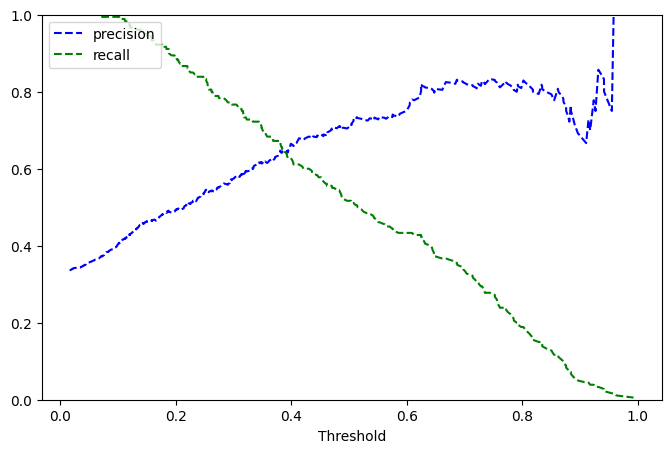

In [ ]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=model_lgr.predict_proba(X_train_scaled)
precisions_lg, recalls_lg, thresholds_lg = metrics.precision_recall_curve(y_train, y_scores_lg[:,1])
# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(8,5))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       357
           1       0.66      0.62      0.64       180

    accuracy                           0.77       537
   macro avg       0.74      0.73      0.73       537
weighted avg       0.76      0.77      0.77       537



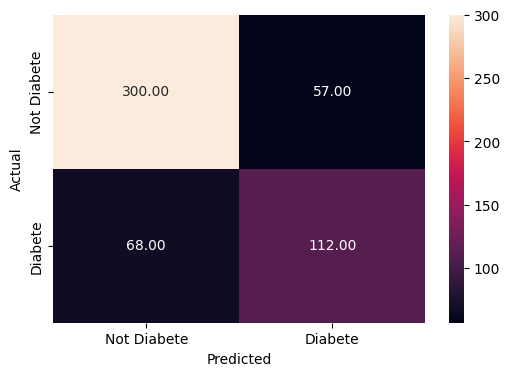

In [ ]:
optimal_threshold=.4
y_pred_train = model_lgr.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       143
           1       0.73      0.70      0.72        88

    accuracy                           0.79       231
   macro avg       0.78      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



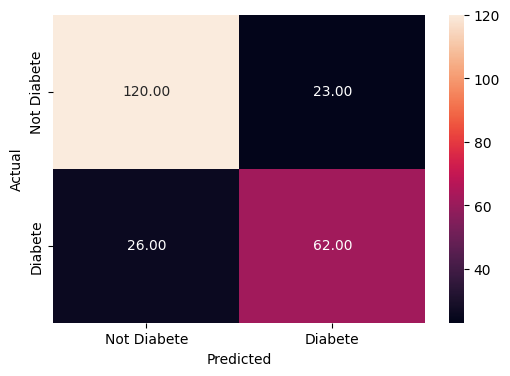

In [ ]:
optimal_threshold=.4
y_pred_test = model_lgr.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

### SVM (Support Vector Machine)

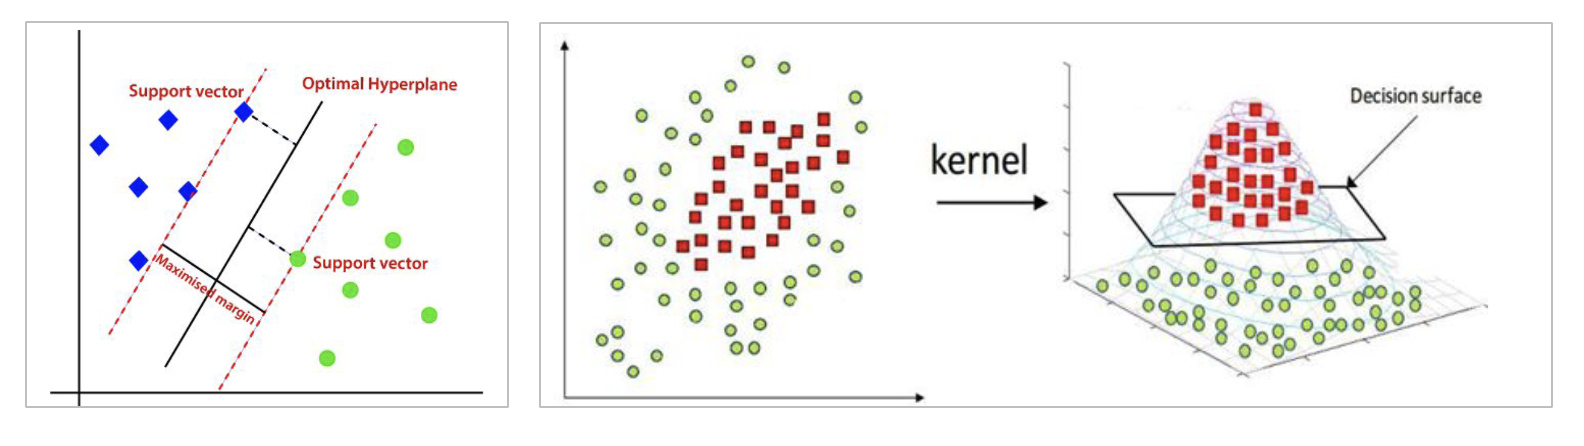

### Principe de base
- Les SVM sont des modèles de machine learning qui peuvent être utilisées à la fois pour les tâches de classification et de régression,
- mais Ils sont plus largement utilisées pour la classification.
- Un SVM vise à trouver un hyperplan dans un espace n-dimensionnel qui classe distinctement toutes les observations d'un ensemble de données
- Il est tout à fait possible d'avoir plusieurs hyperplans qui résolvent le problème. L'algorithme cherche à trouver celui avec la marge maximale.
- La dimension de l'hyperplan est déterminée par le nombre d'entrées
   - ○ Pour 2 caractéristiques d'entrée : ligne
   - ○ Pour 3 caractéristiques d'entrée : plan
- Toutes les données ne sont pas linéairement séparables. Ce qui rend la recherche de l'hyper plan complexe et couteuse en termes de calcul   
### Exemple
On dispose d'une population composée de 50% de femme et 50% d’hommes. En utilisant un échantillon de cette population, on veut créer un ensemble de règles qui nous guideront dans la classification de sexe pour le reste de la population.
On suppose que les deux facteurs de différenciation identifiés sont : la taille de l’individu et la longueur des cheveux. Voici un diagramme de dispersion de l’échantillon:

- Les cercles bleus dans le graphique représentent les femmes et les carrés verts représentent les hommes. Visuellement, on peut distinguer ces deux classes comme suit :
   - Les hommes de cette population ont une taille moyenne plus élevée.
   - Les femmes de cette population ont des cheveux plus longs.

Supposons qu'on a un individu avec la hauteur 180 cm et la longueur des cheveux 4 cm qu'on devra classer. Intuitivement, on va le placer avec les hommes.

À l'aide d'un classificateur de la famille SVM cela est possible à travers un hyperplan séparateur bien choisi.

On commence tout d'abord par projeter chaque élément de données dans l’espace n dimensionnel (où n
 représente le nombre de caractéristiques présentes dans le jeu de données) avec la valeur de chaque caractéristique étant la valeur d’une coordonnée particulière.

Ensuite, on effectue la classification en trouvant l’hyperplan qui différencie très bien les deux classes. Dans le cas de la population ci-dessus, plusieurs choix se présentent.

L'approche la plus adéquate dans ce cas est de trouver la distance minimale de la frontière par rapport a l'élément de la population la plus proche (cet élément peut appartenir à n’importe quelle classe).

Par exemple, la frontière orange est la plus proche des cercles bleus. Et le cercle bleu le plus proche est à 2 unités de la frontière. Une fois que nous avons ces distances pour toutes les frontières, nous choisissons simplement la frontière avec la distance maximale (à partir du vecteur de support le plus proche).

Sur les trois frontières indiquées, nous voyons que la frontière noire est la plus éloignée de l'élément le plus proche (c.-à-d. 15 unités).

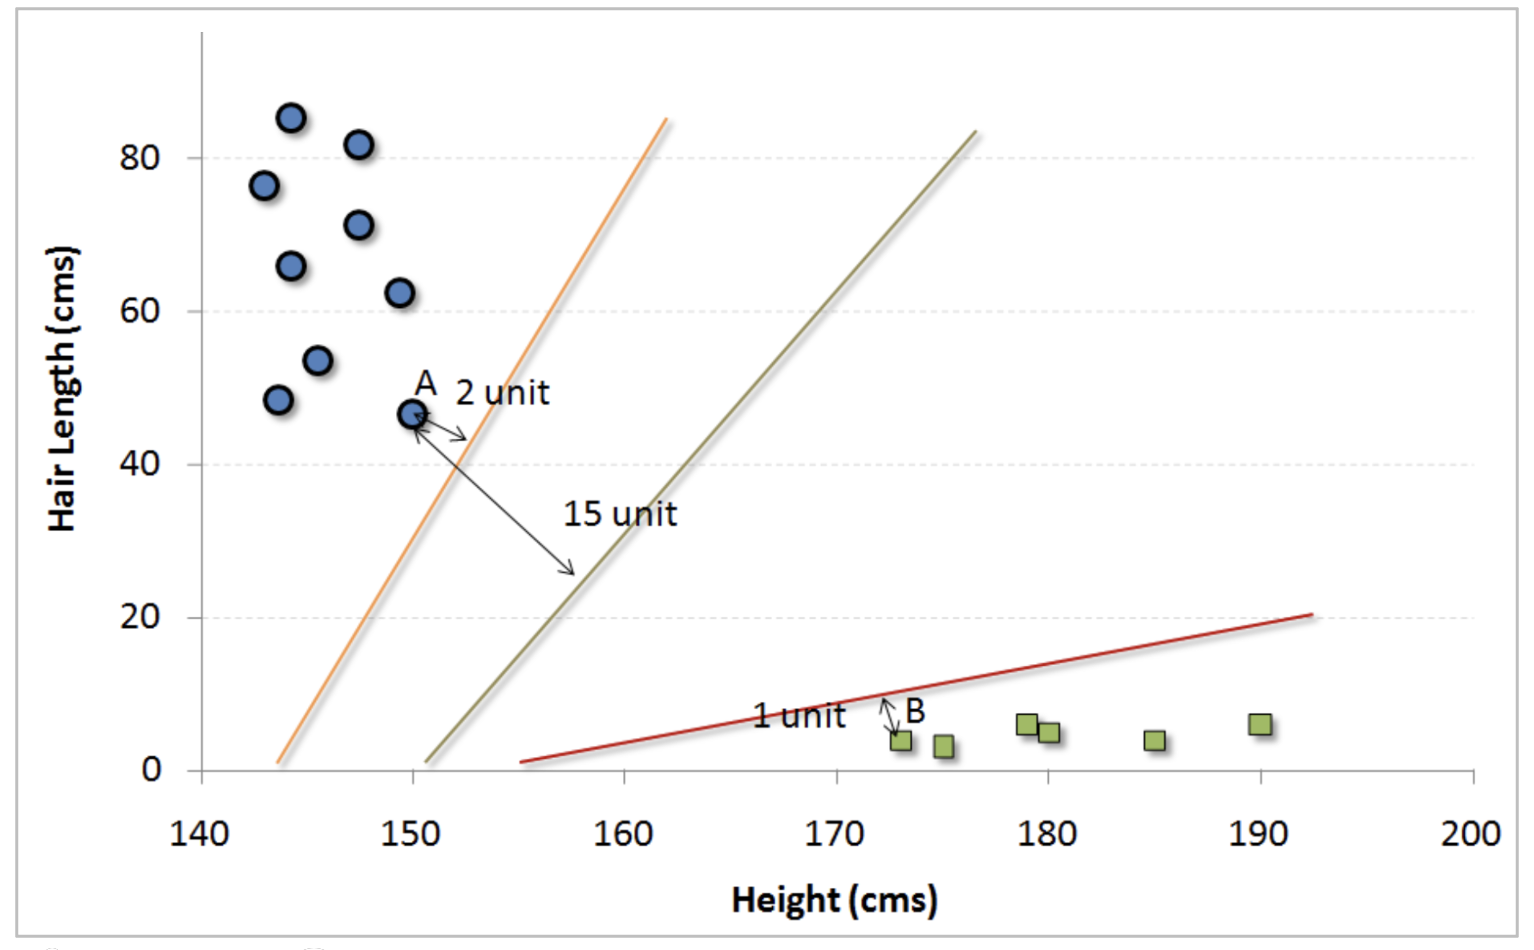

In [ ]:
# Fitting SVM
model2 = SVC(kernel='linear') # Linear kernal or linear decision boundary

In [ ]:
model2.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [ ]:
pred_train=model2.predict(X_train_scaled)
pred_test = model2.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.77      0.88      0.83       353
           1       0.69      0.51      0.58       184

    accuracy                           0.75       537
   macro avg       0.73      0.69      0.71       537
weighted avg       0.75      0.75      0.74       537



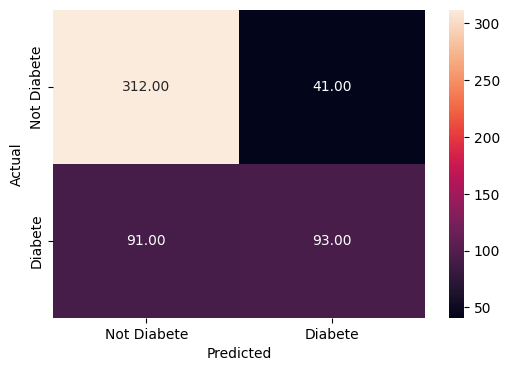

In [ ]:
metrics_score(y_train, pred_train)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       147
           1       0.80      0.58      0.68        84

    accuracy                           0.80       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.80      0.80      0.79       231



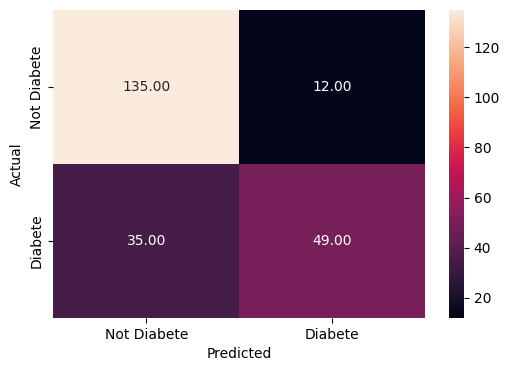

In [ ]:
metrics_score(y_test, pred_test)

### Decision Treee

- Un arbre de décisions est un algorithme d’apprentissage supervisé non paramétrique, utilisé à la fois pour les tâches de classification et de régression. Il possède une structure hiérarchique et arborescente, qui se compose d’un nœud racine, de branches, de nœuds internes et de nœuds feuille.
- Chaque noeud possède une condition qui amène à plusieurs réponses, ce qui dirige à un prochain noeud.
- Lorsqu'un nœud donne la réponse, on dit que le nœud est terminal.

Exemple : Prenons l'arbre de décision suivant qui indique si l'on doit prendre un parapluie avec nous en fonction du temps.

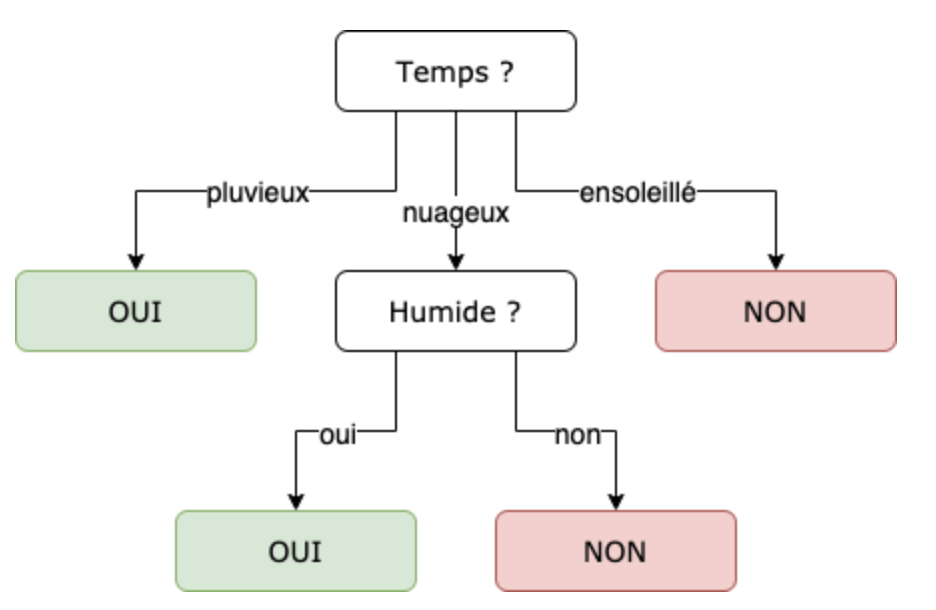

- Dans cet exemple, un jour ensoleillé donnera directement la réponse NON, alors qu'un jour nuageux donnera la réponse OUI ou NON en fonction de l'humidité.

- Sur ce graphique, chaque nœud peut avoir aucune ou plusieurs possibilités: cela va dépendre de s'il est terminal ou non.

- Un arbre de décision binaire est un arbre où chaque nœud non terminal possède exactement deux possibilités (gauche et droite).
- Prenons l'arbre suivant qui indique la mention obtenue à un examen pour un étudiant, et s'il a le droit à des rattrapages en cas de note inférieure à 10.

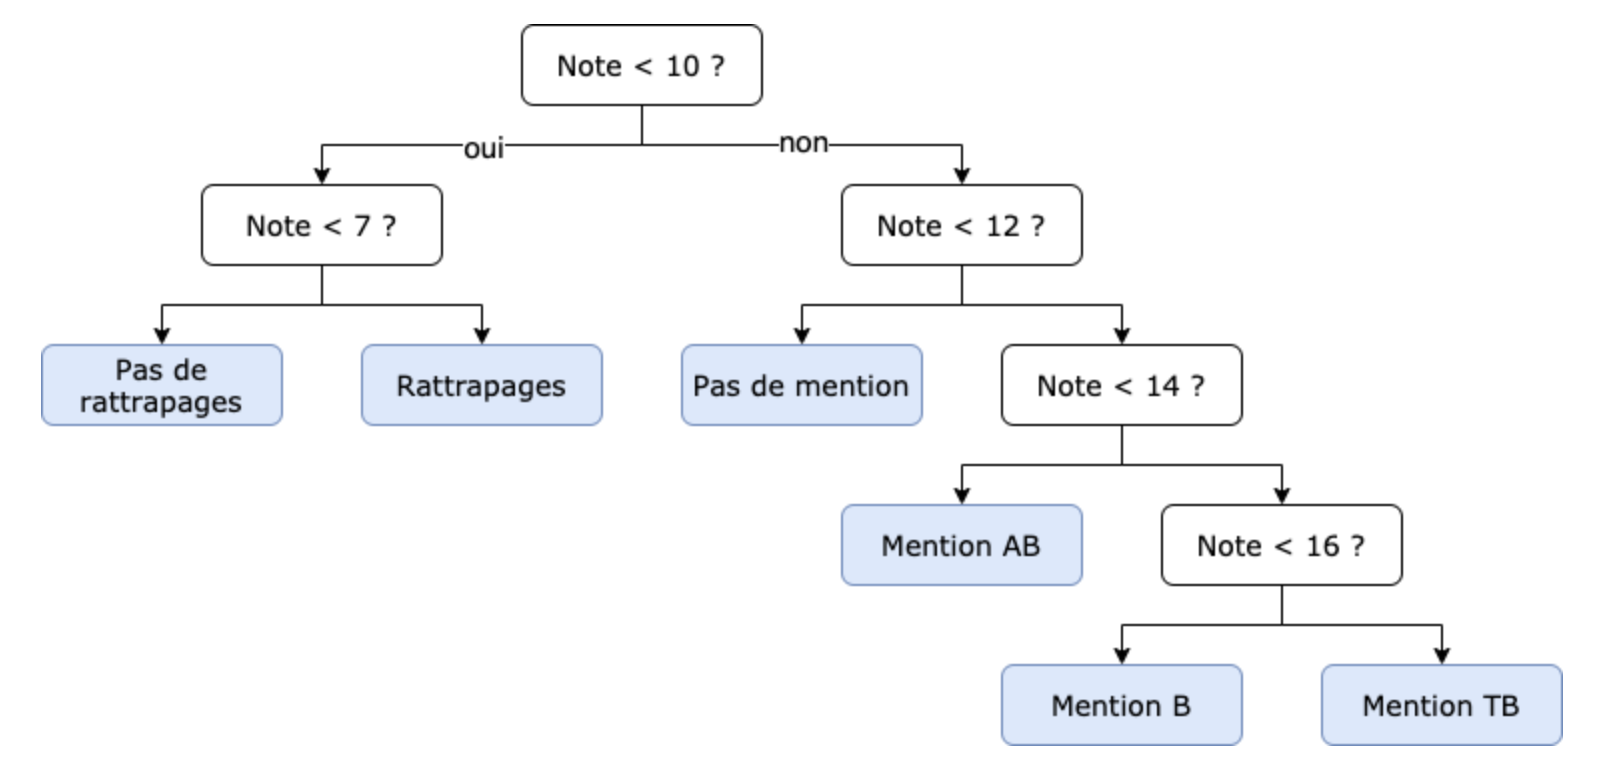

Plusieurs points sont à noter :

- Le premier noeud est appelé noeud racine et possède toujours exactement deux noeuds enfants.
- Chaque noeud non terminal possède toujours deux noeuds enfants.
- Les conditions de noeuds ne peuvent avoir que deux états : Vrai ou Faux.
- Le noeud enfant de gauche correspond toujours (dans cet arbre) à la situation où la condition est vérifiée (Vrai), et inversement le noeud enfant de droite correspond toujours à la situation où la condition n'est pas vérifiée (Faux).

In [ ]:
# Building decision tree model
model3 = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [ ]:
model3.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [ ]:
pred_train=model3.predict(X_train_scaled)
pred_test = model3.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       184

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



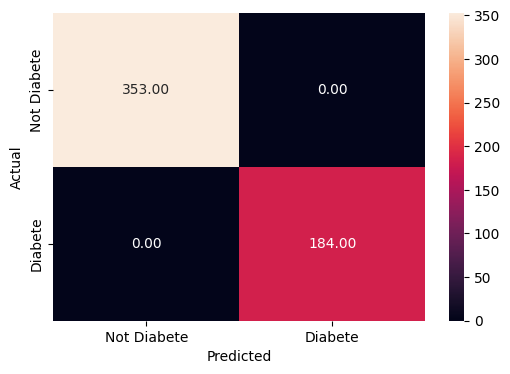

In [ ]:
metrics_score(y_train, pred_train)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       147
           1       0.63      0.45      0.53        84

    accuracy                           0.71       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.70      0.71      0.69       231



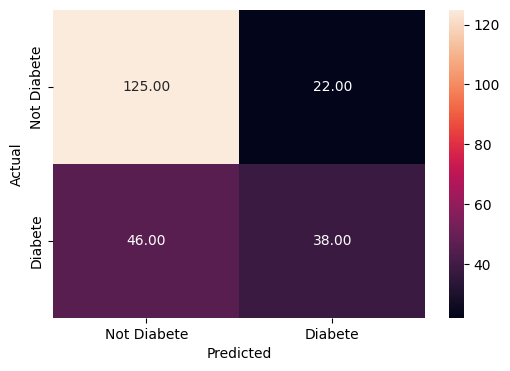

In [ ]:
metrics_score(y_test, pred_test)

In [ ]:
# Plot the feature importance

importances = model3.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


In [ ]:
importance_df

Importance
Glucose                     0.366708
BMI                         0.187544
DiabetesPedigreeFunction    0.131999
Age                         0.085482
Insulin                     0.073709
SkinThickness               0.060673
BloodPressure               0.058156
Pregnancies                 0.035728

In [ ]:
importance_df=importance_df.reset_index()
importance_df

level_0                     index  Importance
0        0                   Glucose    0.366708
1        1                       BMI    0.187544
2        2  DiabetesPedigreeFunction    0.131999
3        3                       Age    0.085482
4        4                   Insulin    0.073709
5        5             SkinThickness    0.060673
6        6             BloodPressure    0.058156
7        7               Pregnancies    0.035728

<Axes: xlabel='Importance', ylabel='index'>

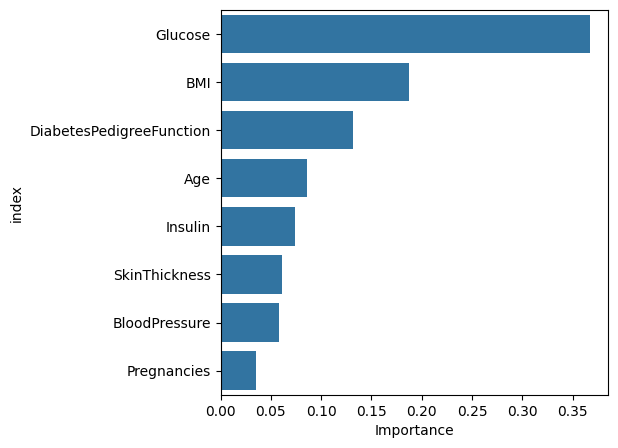

In [ ]:
plt.figure(figsize = (5, 5))
sns.barplot(data=importance_df, y='index',x='Importance', orient='h')

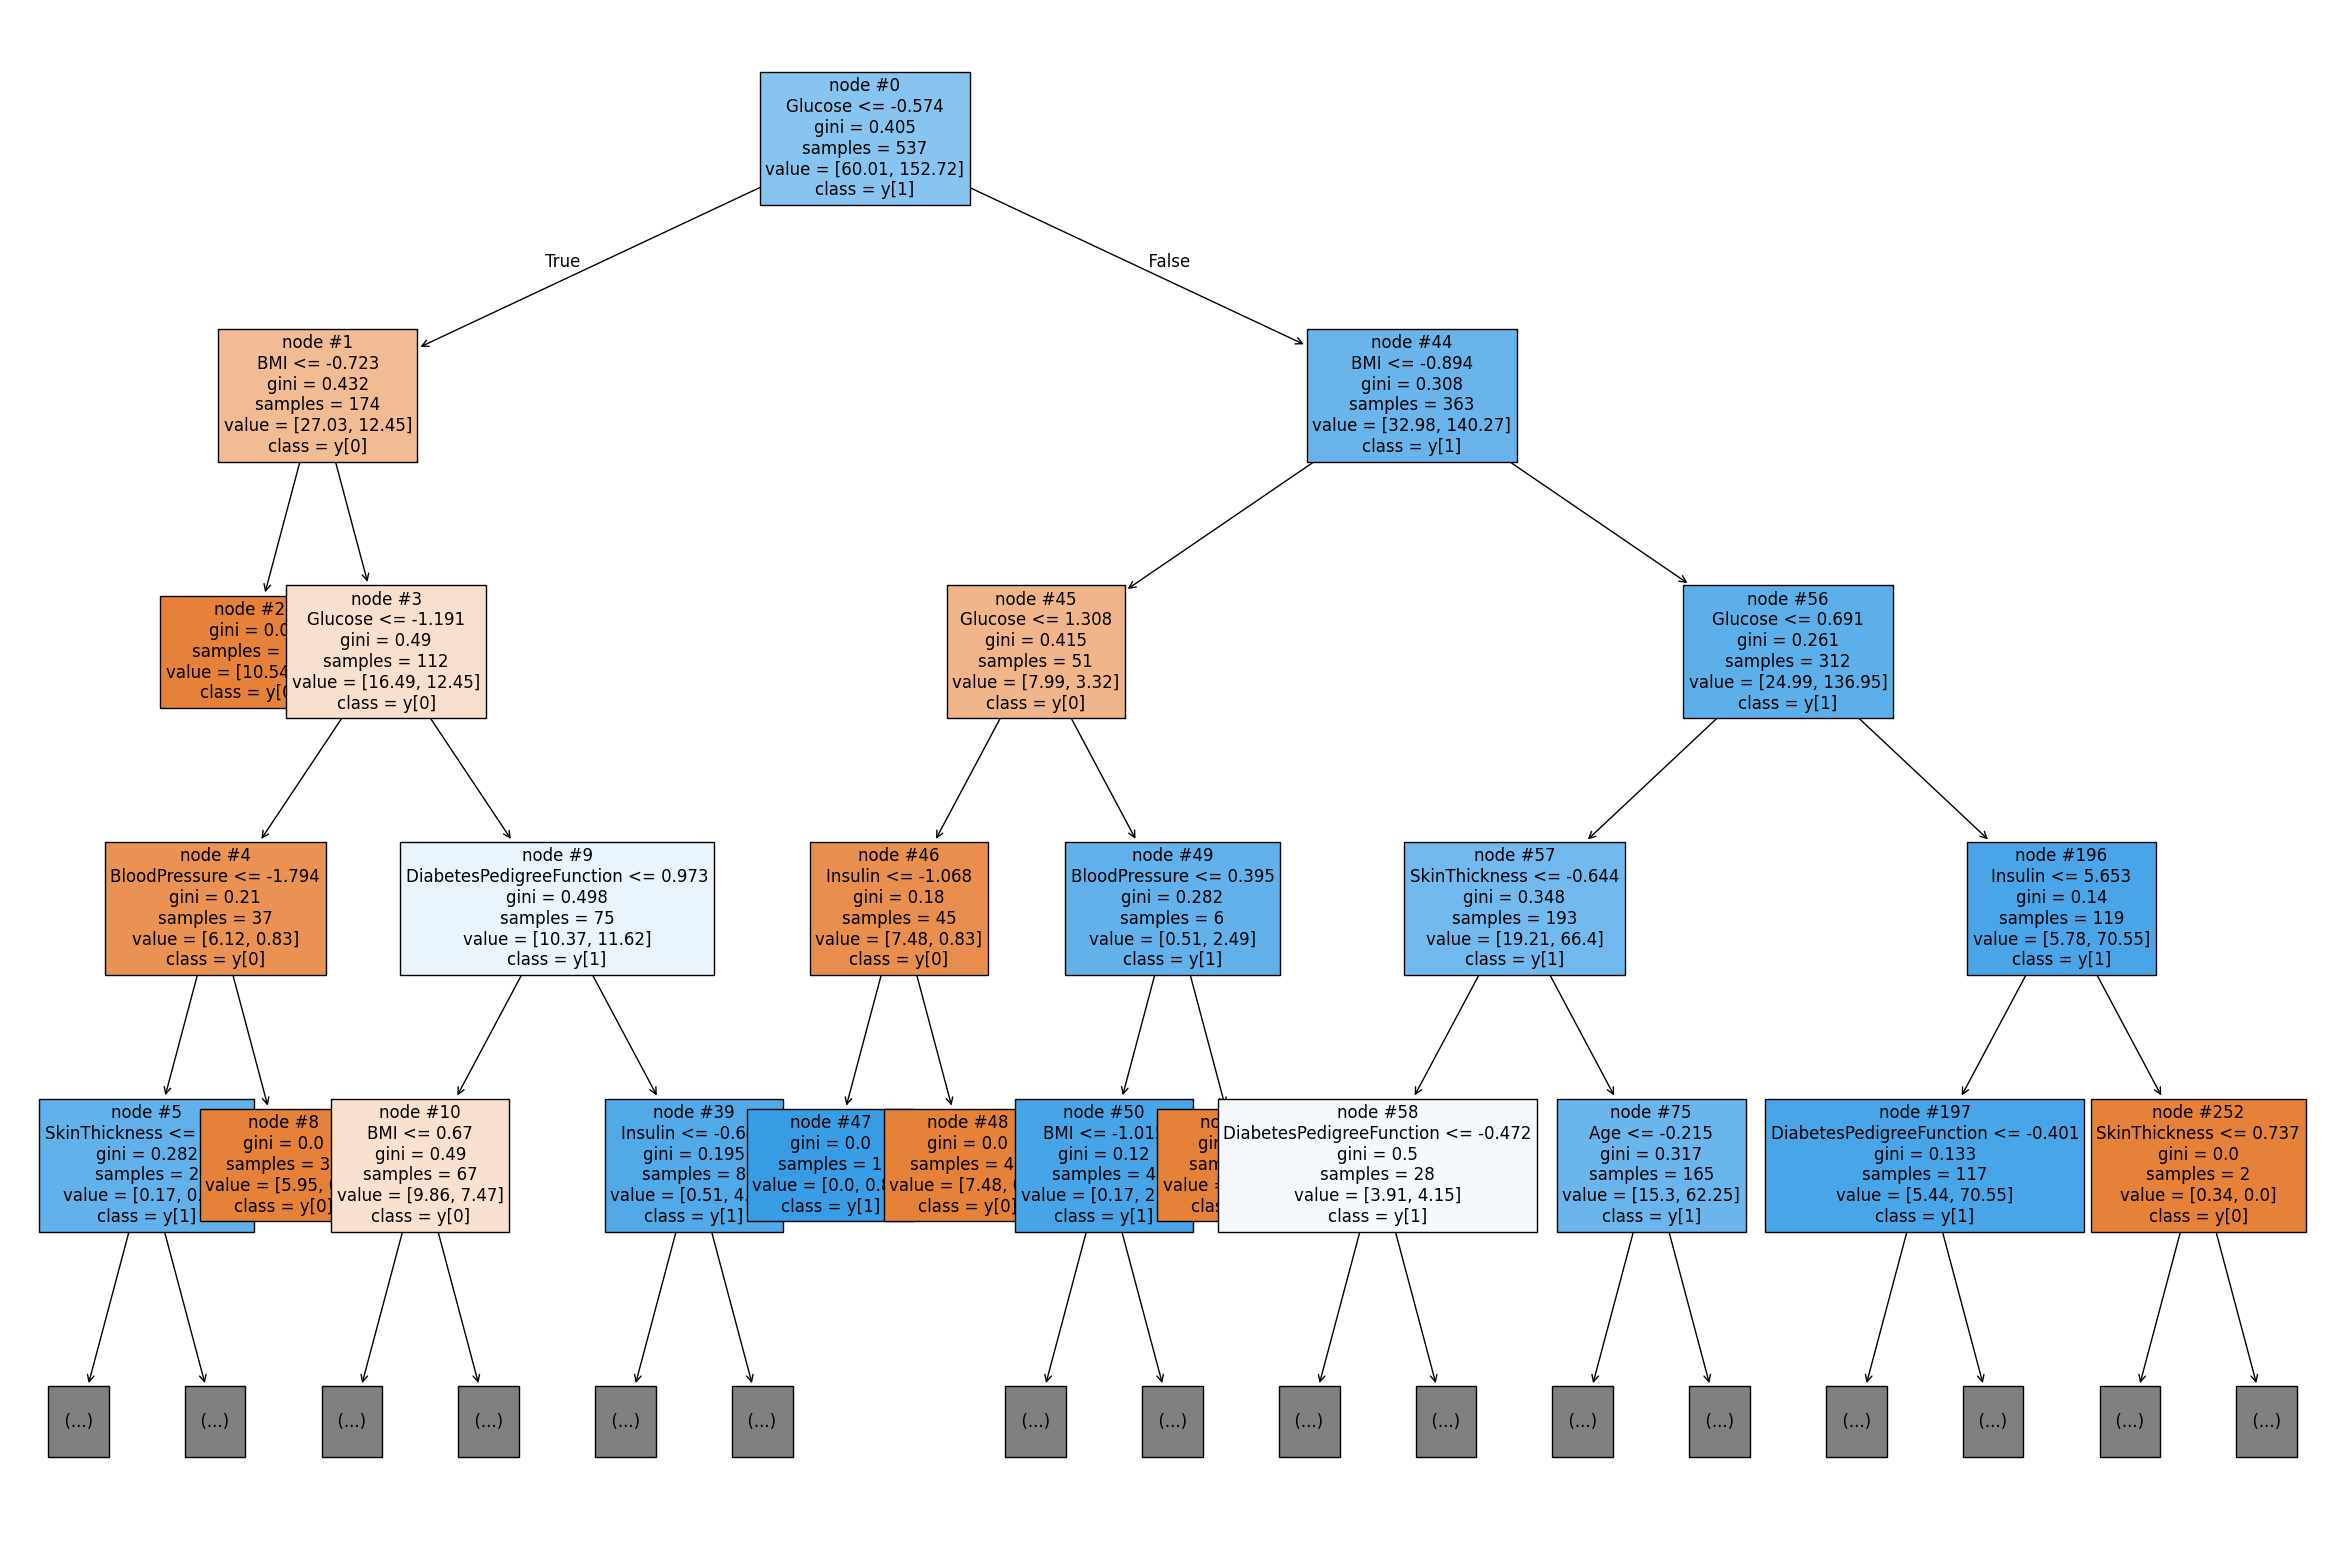

In [ ]:
from sklearn import tree
features = list(X.columns)
plt.figure(figsize = (30, 20))
tree.plot_tree(model3, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

### Neural Network : Multi Layer Perceptron

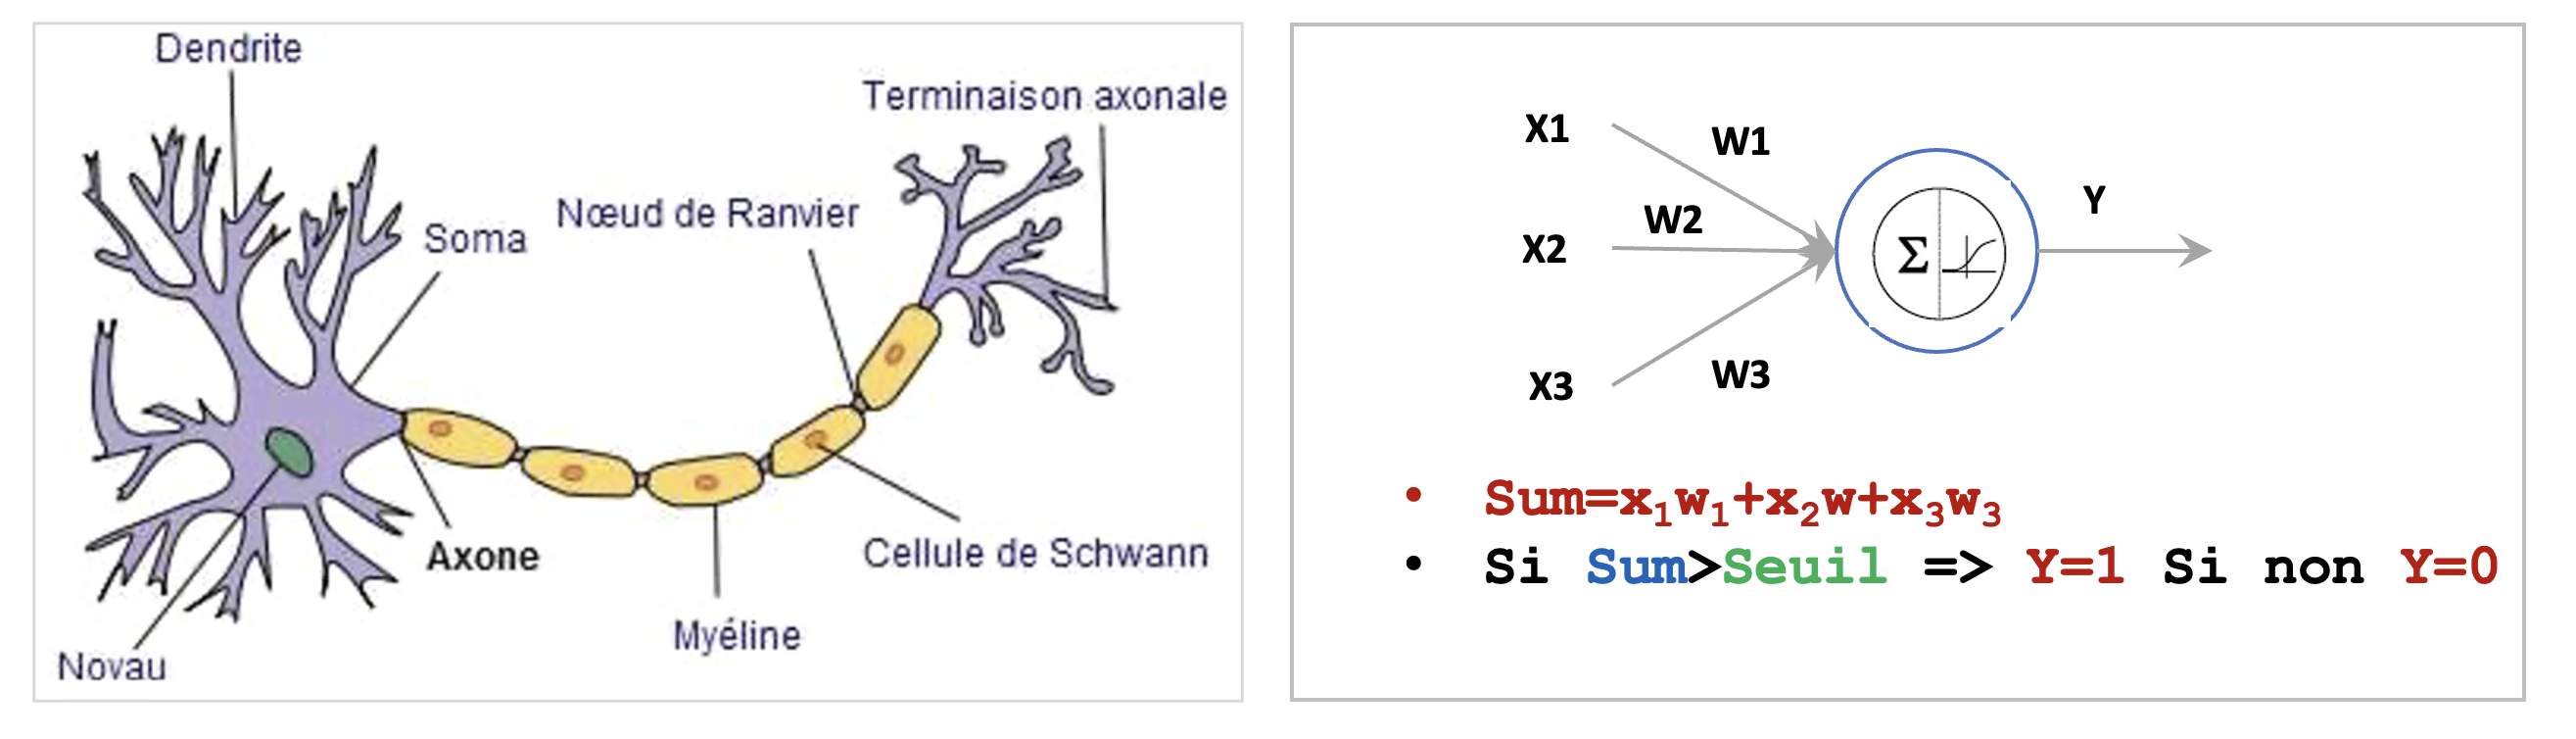

- Un **neurone artificiel (NA)** est une unité de calcul élémentaire (fonction mathématique ) permet de mettre en relations des entrées Xi avec une sortie Y

- Un neurone artificiel est représentation approximative d’un neurone biologique
   - Additionne ses entrées xi pondérées par des poids wi ,
   - Compare la somme résultante à une valeur seuil selon un fonction d’activation,
   - Répond en émettant un signal si cette somme est supérieure ou égale à ce seuil (modèle ultra-simplifié du fonctionnement d'un neurone biologique).
   - Ces neurones sont par ailleurs associés en réseaux dont la topologie des connexions est variable : réseaux proactifs, récurrents, etc.
   - L'efficacité de la transmission des signaux d'un neurone à l'autre peut varier : on parle de « poids synaptique », et ces poids peuvent être modulés par des règles d'apprentissage (ce qui mime la plasticité synaptique des réseaux biologiques).

- Un neurone reçoit des signaux venant de d’autres neurones à travers ses dendrites(connexions)
Emit un signal ou non à travers son Axone selon les entrées reçues et les poids synaptiques.



### **Perceptron**

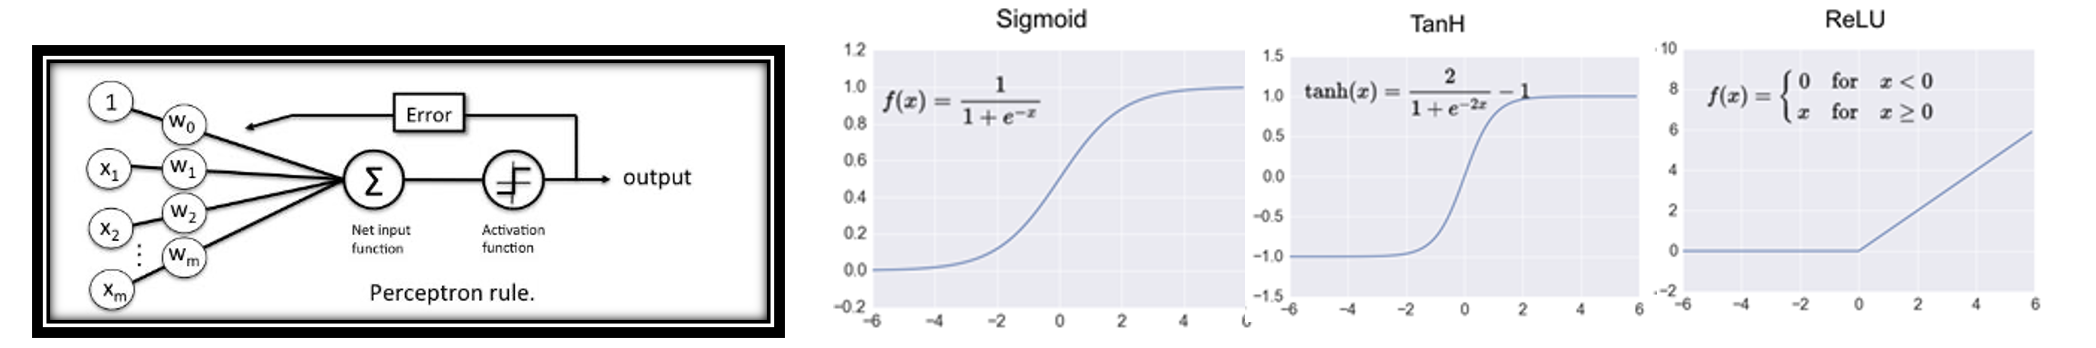

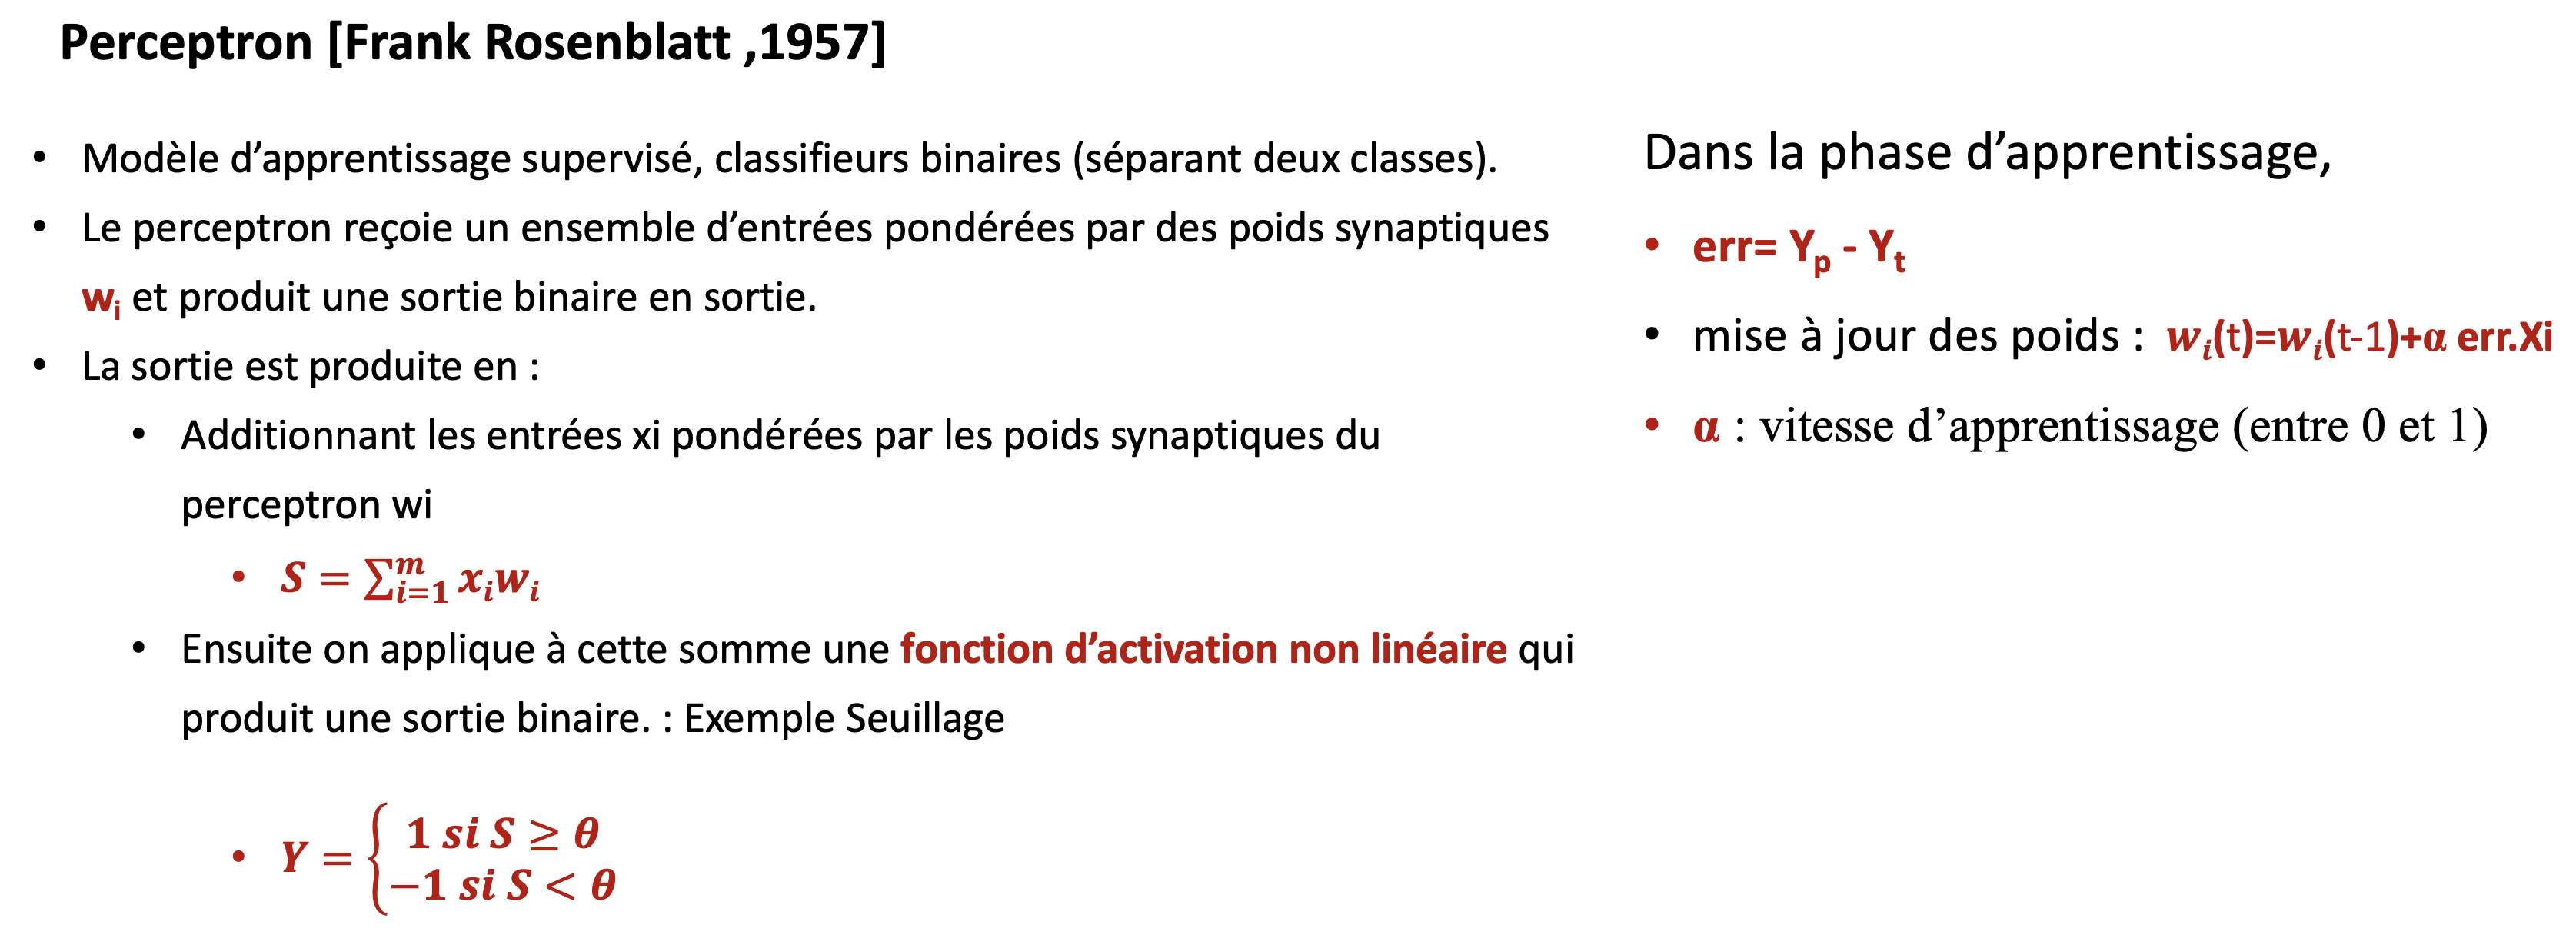

### **Multi Layer Perceptron**

- Un Multi Layer Perceptron (MLP) est un type de réseau de neurones artificiels composé de plusieurs couches de neurones. Voici ses principales caractéristiques :
- Couches : Il comprend une couche d'entrée, une ou plusieurs couches cachées, et une couche de sortie.
- Neurones : Les neurones dans chaque couche sont connectés à tous les neurones de la couche précédente (connexion "fully connected").
- Fonction d'activation : Chaque neurone applique une fonction d'activation (comme ReLU, sigmoïde, ou tanh) pour introduire de la non-linéarité.
- Entraînement par rétropropagation : L'apprentissage du MLP se fait par rétropropagation de l'erreur à l'aide d'un algorithme d'optimisation, comme l'Adam ou le SGD.

- Un MLP est souvent utilisé pour des tâches de classification ou de régression et est une forme de réseau de neurones feedforward.


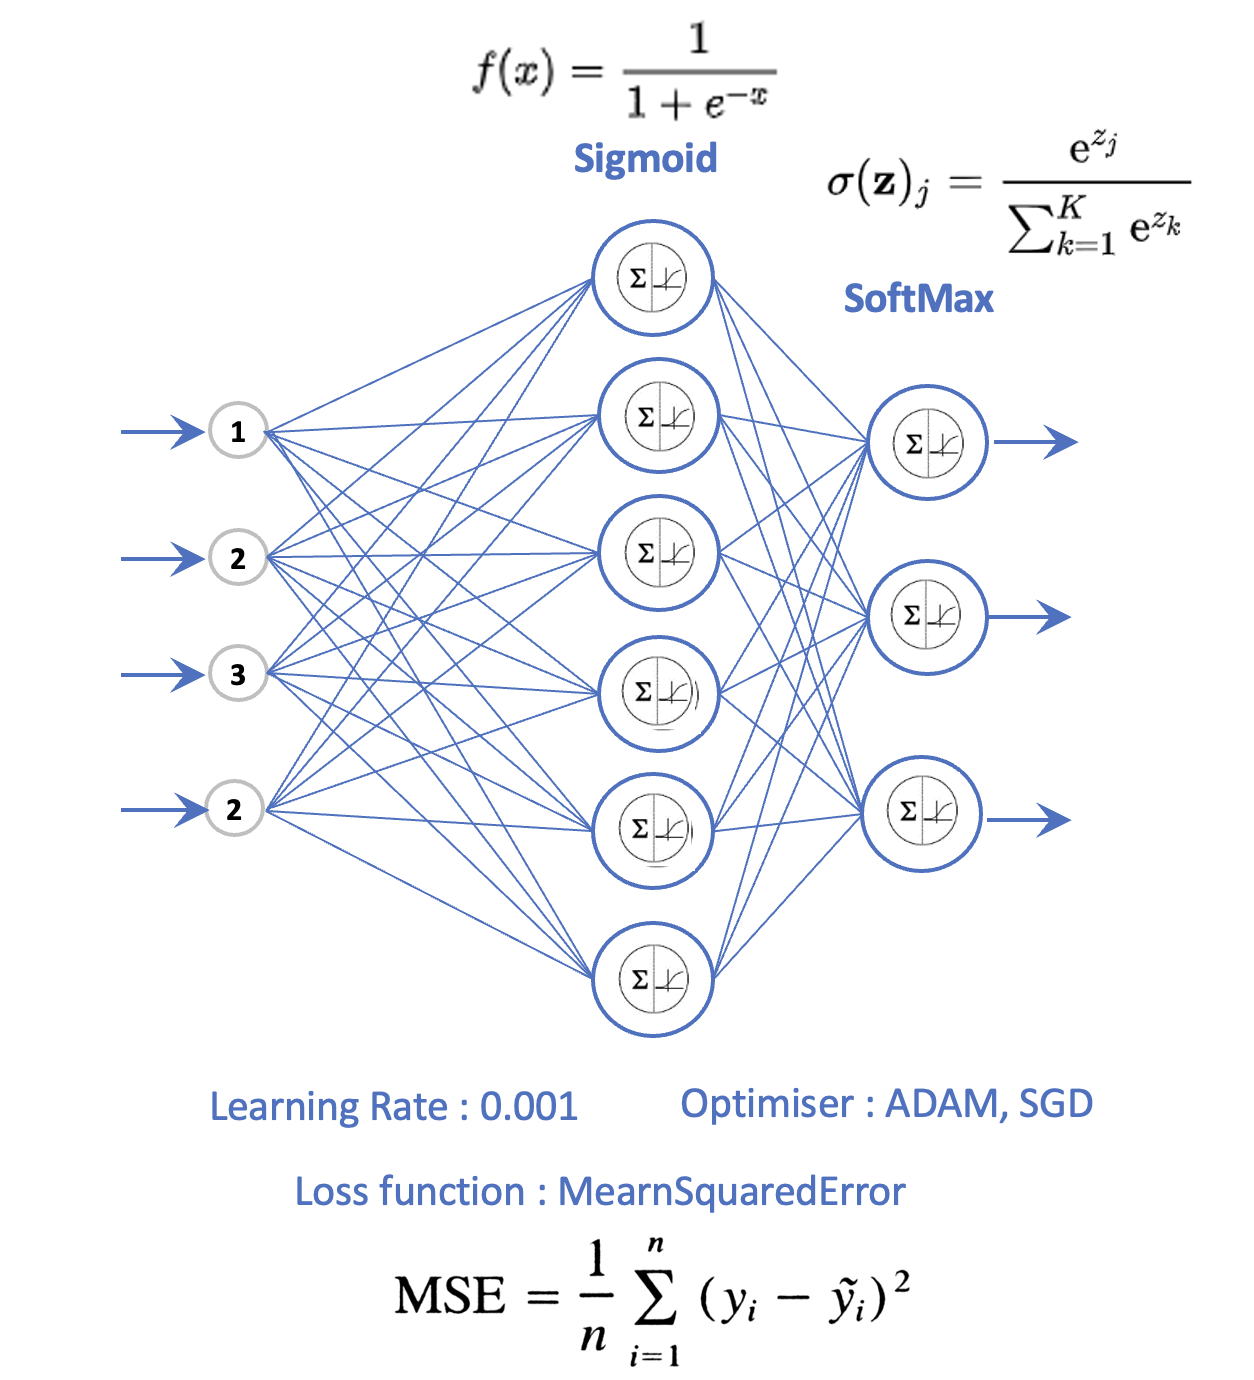

In [ ]:
from sklearn.neural_network import MLPClassifier
model4 = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10,5,3), random_state=1, max_iter=2000)
model4.fit(X= X_train_scaled, y = y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5, 3), max_iter=2000,
              random_state=1, solver='lbfgs')

In [ ]:
pred_train=model4.predict(X_train_scaled)
pred_test = model4.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       353
           1       0.87      0.92      0.89       184

    accuracy                           0.93       537
   macro avg       0.91      0.93      0.92       537
weighted avg       0.93      0.93      0.93       537



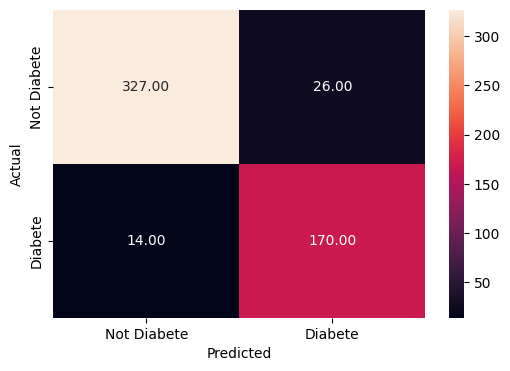

In [ ]:
metrics_score(y_train, pred_train)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       147
           1       0.67      0.64      0.65        84

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



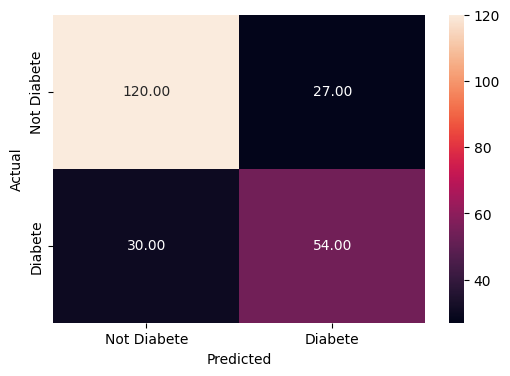

In [ ]:
metrics_score(y_test, pred_test)

### **KNN (K-Nearest Neighbors)**

L’algorithme des K plus proches voisins ou K-nearest neighbors (kNN) est un algorithme de Machine Learning qui appartient à la classe des algorithmes d’apprentissage supervisé simple et facile à mettre en œuvre qui peut être utilisé pour résoudre les problèmes de classification et de régression

Algorithme :

- On choisit une valeur pour k
- On calcule les distances d entre la nouvelle donnée N et ses voisins Xi
 déjà classifiés.
- Parmi les points Xi, les k plus proches de N sont retenus.
- On attribue à N le label majoritaire parmi les k plus proches voisins

Avantage : Phase d'entrainement très rapide (Pas d'apprentissage)

Inconvénient : Phase de Prédiction très couteuse si le dataset d'entrainement est très grand

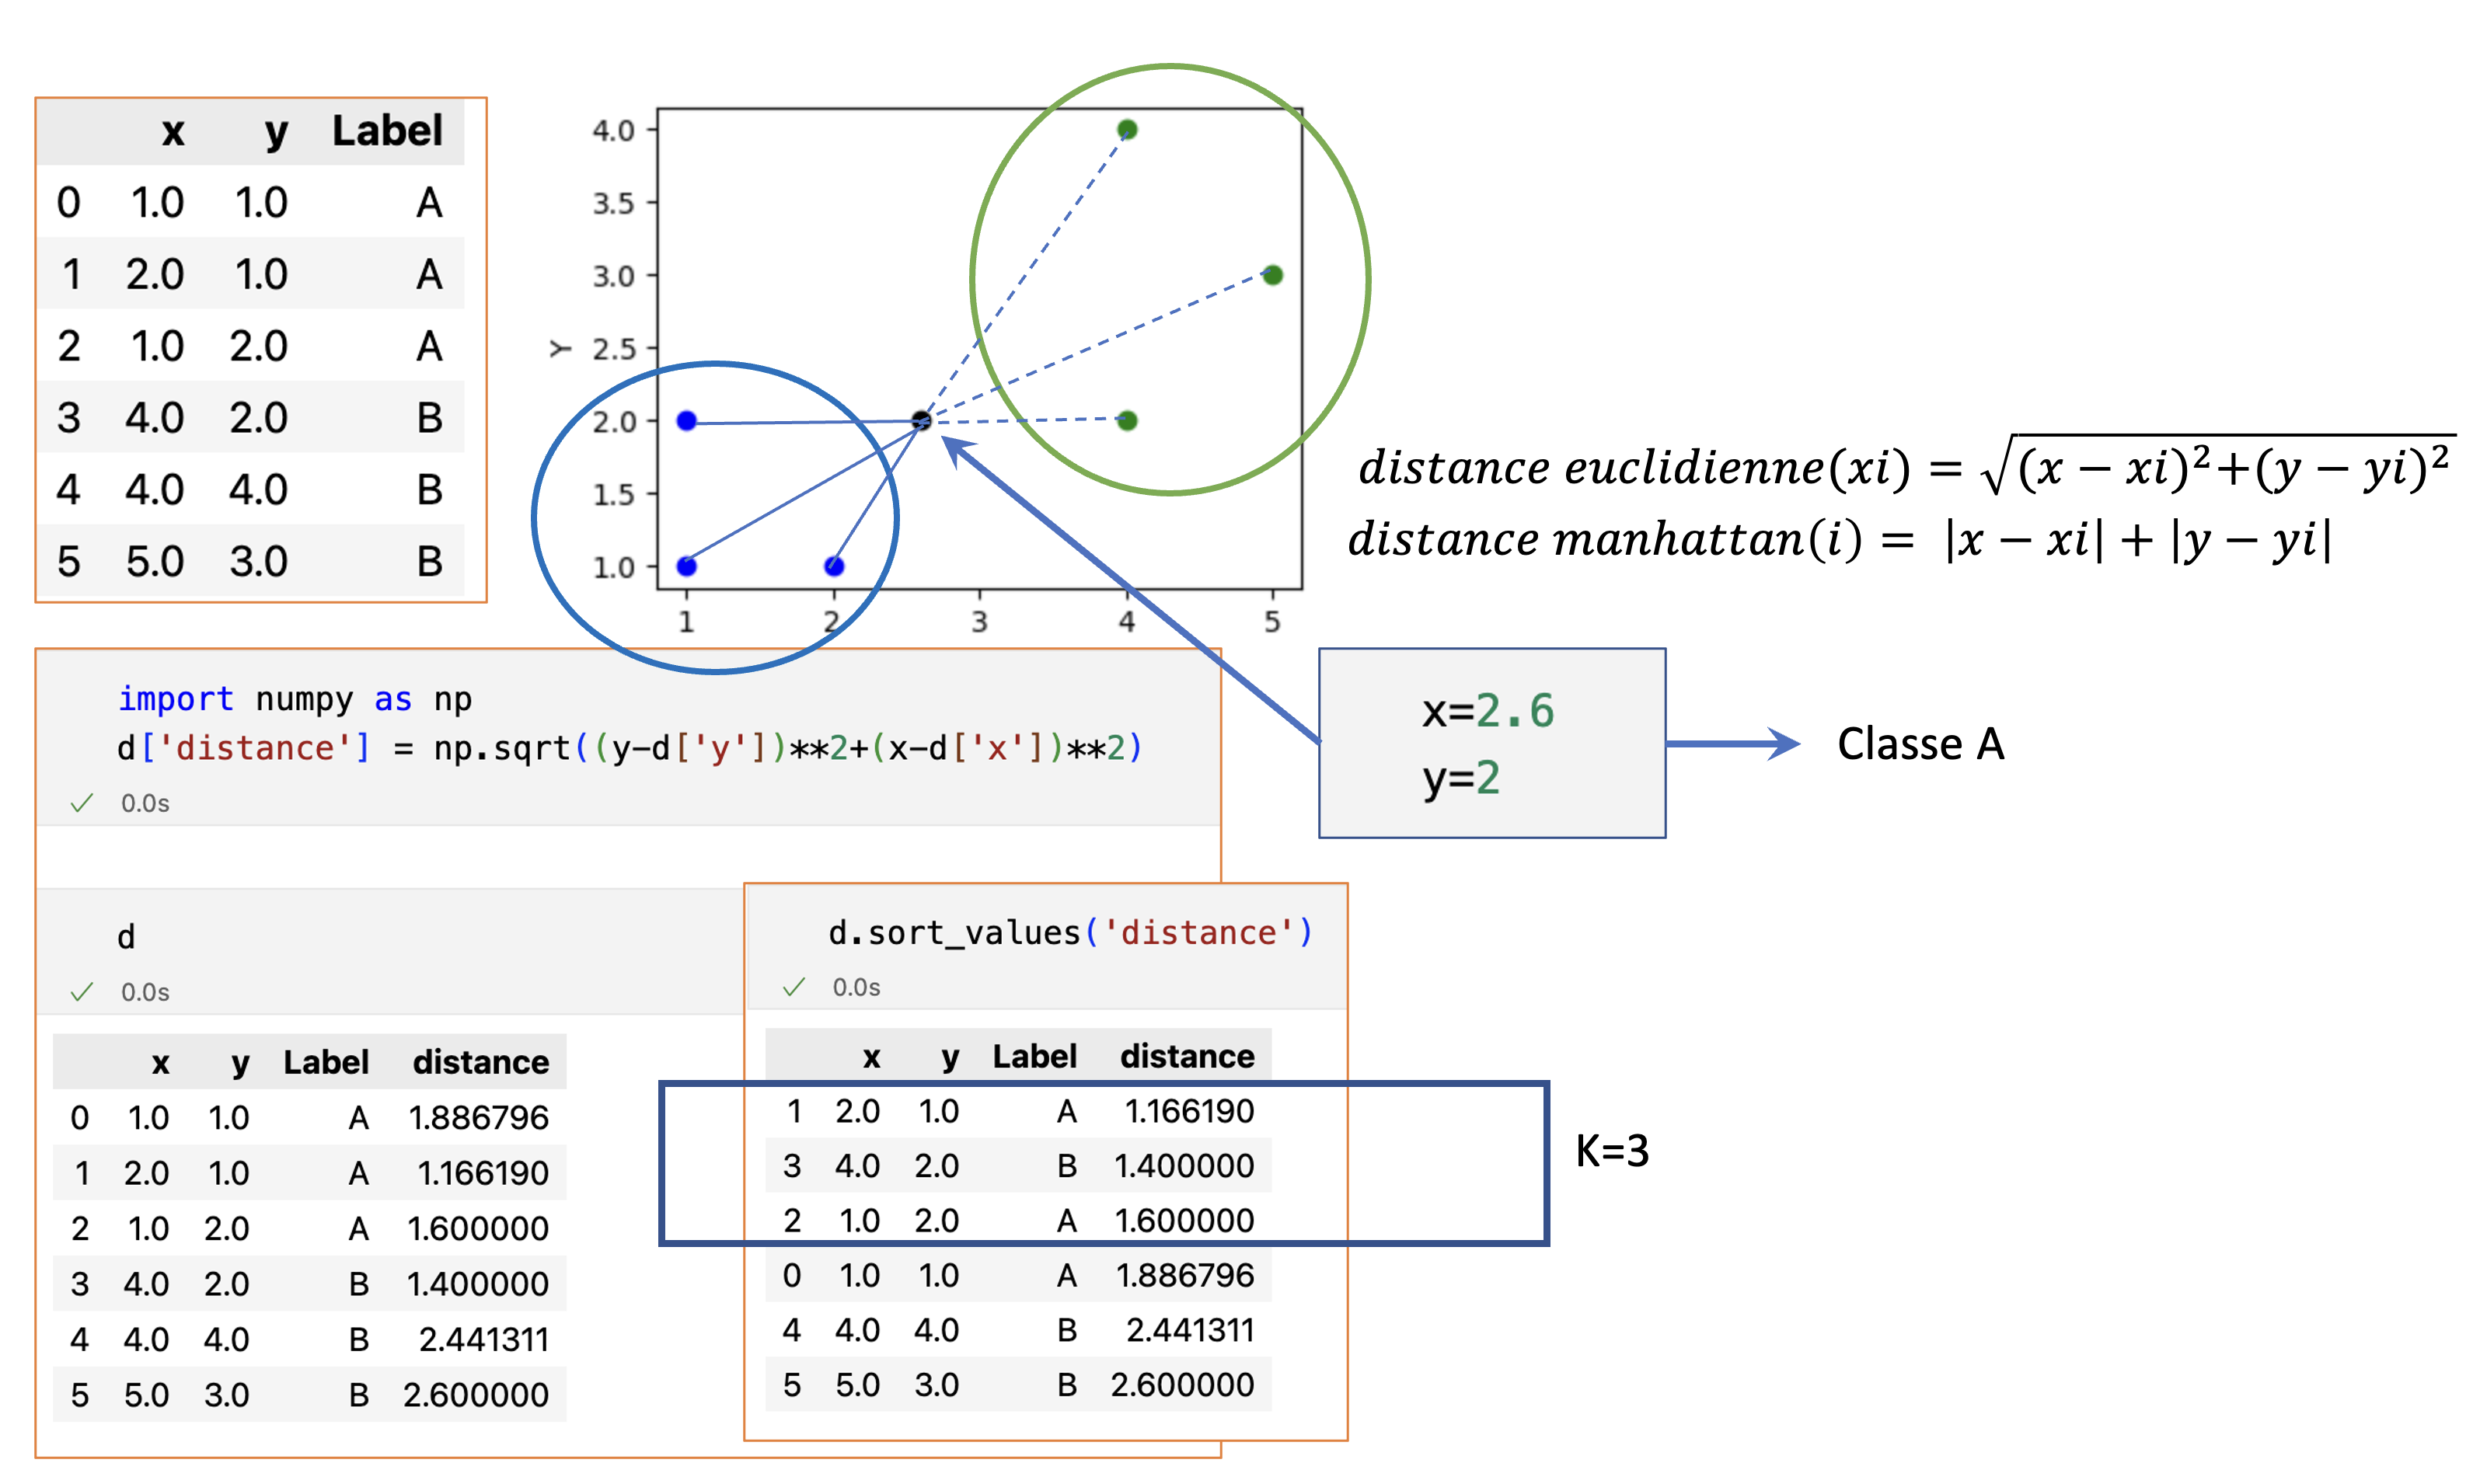

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X= X_train_scaled, y = y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
pred_train=knn.predict(X_train_scaled)
pred_test = knn.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       353
           1       0.79      0.75      0.77       184

    accuracy                           0.85       537
   macro avg       0.83      0.82      0.83       537
weighted avg       0.85      0.85      0.85       537



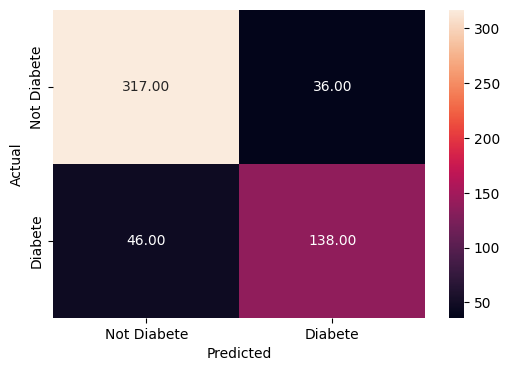

In [ ]:
metrics_score(y_train, pred_train)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       147
           1       0.67      0.58      0.62        84

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



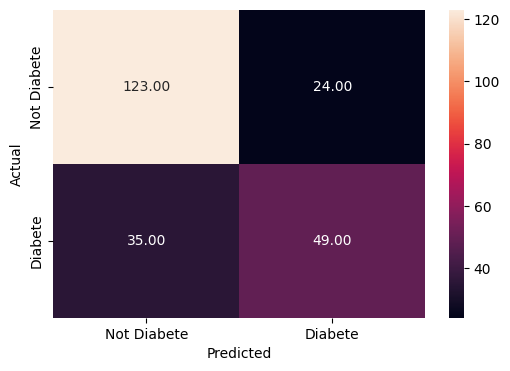

In [ ]:
metrics_score(y_test, pred_test)

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( random_state = 1)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [ ]:
pred_train=rf.predict(X_train)
pred_test = rf.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       353
           1       1.00      1.00      1.00       184

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



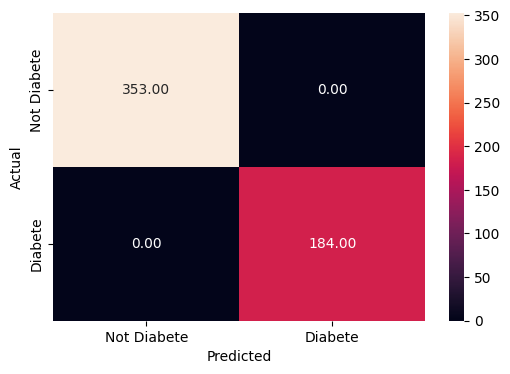

In [ ]:
metrics_score(y_train, pred_train)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       147
           1       0.74      0.57      0.64        84

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



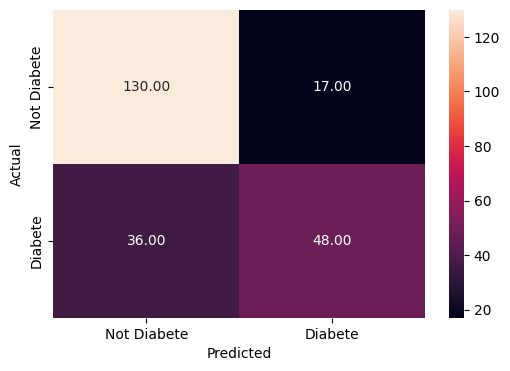

In [ ]:
metrics_score(y_test, pred_test)

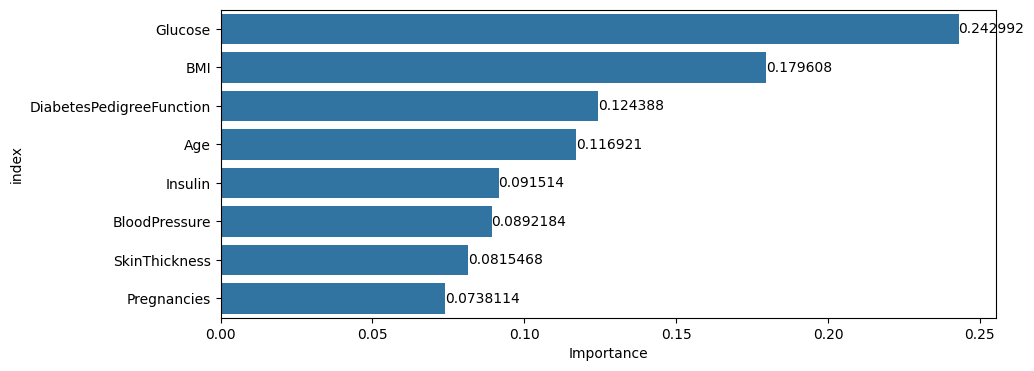

In [ ]:
importances = rf.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(
    importances, index = columns,
    columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
importance_df=importance_df.reset_index()
plt.figure(figsize = (10, 4))
bar =sns.barplot(data=importance_df,x='Importance', y='index', orient='h')
bar = bar.bar_label(bar.containers[0], fontsize=10)

In [ ]:
d = pd.read_csv('d.csv')

In [ ]:
d

x    y Label
0  1.0  1.0     A
1  2.0  1.0     A
2  1.0  2.0     A
3  4.0  2.0     B
4  4.0  4.0     B
5  5.0  3.0     B

In [ ]:
x=2.6
y=2

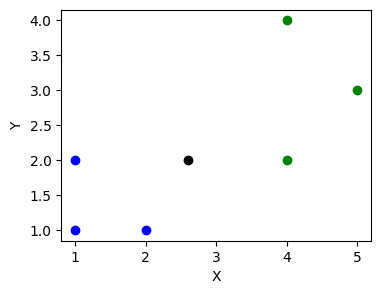

In [ ]:
groupe_A = d[d['Label']=='A']
groupe_B = d[d['Label']=='B']
plt.figure(figsize=(4,3))
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(groupe_A['x'], groupe_A['y'], color = 'b')
plt.scatter(groupe_B['x'], groupe_B['y'], color = 'g')
plt.scatter(x, y, color='black')

In [ ]:
import numpy as np
d['distance'] = np.sqrt((y-d['y'])**2+(x-d['x'])**2)

In [ ]:
d

x    y Label  distance
0  1.0  1.0     A  1.886796
1  2.0  1.0     A  1.166190
2  1.0  2.0     A  1.600000
3  4.0  2.0     B  1.400000
4  4.0  4.0     B  2.441311
5  5.0  3.0     B  2.600000

In [ ]:
d.sort_values('distance')

x    y Label  distance
1  2.0  1.0     A  1.166190
3  4.0  2.0     B  1.400000
2  1.0  2.0     A  1.600000
0  1.0  1.0     A  1.886796
4  4.0  4.0     B  2.441311
5  5.0  3.0     B  2.600000